# Rlab04

- Student: Giovanni Zago
- Course: PoD
- Matriculation number: 2089577

In [27]:
library(tidyverse)
library(ggplot2)
library(hrbrthemes) # for heatmap color palette
library(patchwork) # to create subplots
library (magrittr)
library(lubridate)
library(scales) # use transparent parameter in plots and use scale_x_continuous
set.seed(09112001) # set seed for reproducibility

# Exercise 1

The number of claims received by an insurance company during a week follows a Poisson distri-bution with unknown mean $\mu$. The number of claims, per week, observed over a ten week period are:

```5, 8, 4, 6, 11, 6, 6, 5, 6, 4```

## Request (a)

Suppose to use a prior uniform distribution for $\mu$
- find the posterior distribution for $\mu$ and compute the posterior mean, median and variance
- compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation

In [2]:
obs = c(5, 8, 4, 6, 11, 6, 6, 5, 6, 4)
n = length(obs)

n_samples = 2000
mu = seq(from = 1 / (2 * n_samples), to = max(obs) + 2, length.out = n_samples)
delta_mu = mu[2] - mu[1]

# gamma posterior with uniform prior using second parametrization on Wikipedia with shape and rate
post_unif = dgamma(x = mu, shape = 1 + sum(obs), rate = n)
mean_unif = sum(post_unif * mu) * delta_mu
median_unif = qgamma(p = 0.5, shape = 1 + sum(obs), rate = n)
median_unif = median_unif[2]
variance_unif = sum(post_unif * (mu - mean_unif) ** 2) * delta_mu

lower_unif = qgamma(p = 0.025, shape = 1 + sum(obs), rate = n)
upper_unif = qgamma(p = 0.975, shape = 1 + sum(obs), rate = n)
lower_unif_g = mean_unif - 2 * variance_unif ** (1/2)
upper_unif_g = mean_unif + 2 * variance_unif ** (1/2)

cat('-------- GAMMA POSTERIOR FROM UNIFORM PRIOR --------\n')
cat('mean: ', format(mean_unif, digits = 2), sep = '', '\n')
cat('median: ', format(median_unif, digits = 4), sep = '', '\n')
cat('variance: ', format(variance_unif, digits = 2), sep = '', '\n')
cat('posterior 95% c.i.: ', '(', format(lower_unif, digits = 2), ', ', format(upper_unif, digits = 2), ')', sep = '', '\n')
cat('Gauss approx 95% c.i.: ', '(', format(lower_unif_g, digits = 2), ', ', format(upper_unif_g, digits = 2), ')', sep = '', '\n')

-------- GAMMA POSTERIOR FROM UNIFORM PRIOR --------
mean: 6.2
median: NA
variance: 0.62
posterior 95% c.i.: (4.8, 7.8)
Gauss approx 95% c.i.: (4.6, 7.8)


## Request (b)

Suppose to use a Jeffreys’ prior for $\mu$
- find the posterior distribution for $\mu$ and compute the posterior mean, median and variance
- compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean and standard deviation

In [3]:
# gamma posterior with Jeffrey's prior
post_jeff = dgamma(x = mu, shape = 0.5 + sum(obs), rate = n)
mean_jeff = sum(post_jeff * mu) * delta_mu
median_jeff = qgamma(p = 0.5, shape = 0.5 + sum(obs), rate = n)
median_jeff = median_jeff[2]
variance_jeff = sum(post_jeff * (mu - mean_jeff) ** 2) * delta_mu

lower_jeff = qgamma(p = 0.025, shape = 0.5 + sum(obs), rate = n)
upper_jeff = qgamma(p = 0.975, shape = 0.5 + sum(obs), rate = n)
lower_jeff_g = mean_jeff - 2 * variance_jeff ** (1/2)
upper_jeff_g = mean_jeff + 2 * variance_jeff ** (1/2)

cat('-------- GAMMA POSTERIOR FROM JEFFREY\'S PRIOR --------\n')
cat('mean: ', format(mean_jeff, digits = 2), sep = '', '\n')
cat('median: ', format(median_jeff, digits = 4), sep = '', '\n')
cat('variance: ', format(variance_jeff, digits = 2), sep = '', '\n')
cat('posterior 95% c.i.: ', '(', format(lower_jeff, digits = 2), ', ', format(upper_jeff, digits = 2), ')', sep = '', '\n')
cat('Gauss approx 95% c.i.: ', '(', format(lower_jeff_g, digits = 2), ', ', format(upper_jeff_g, digits = 2), ')', sep = '', '\n')

-------- GAMMA POSTERIOR FROM JEFFREY'S PRIOR --------
mean: 6.1
median: NA
variance: 0.61
posterior 95% c.i.: (4.7, 7.8)
Gauss approx 95% c.i.: (4.6, 7.7)


Plot the posterior distributions and their 95% credibility interval

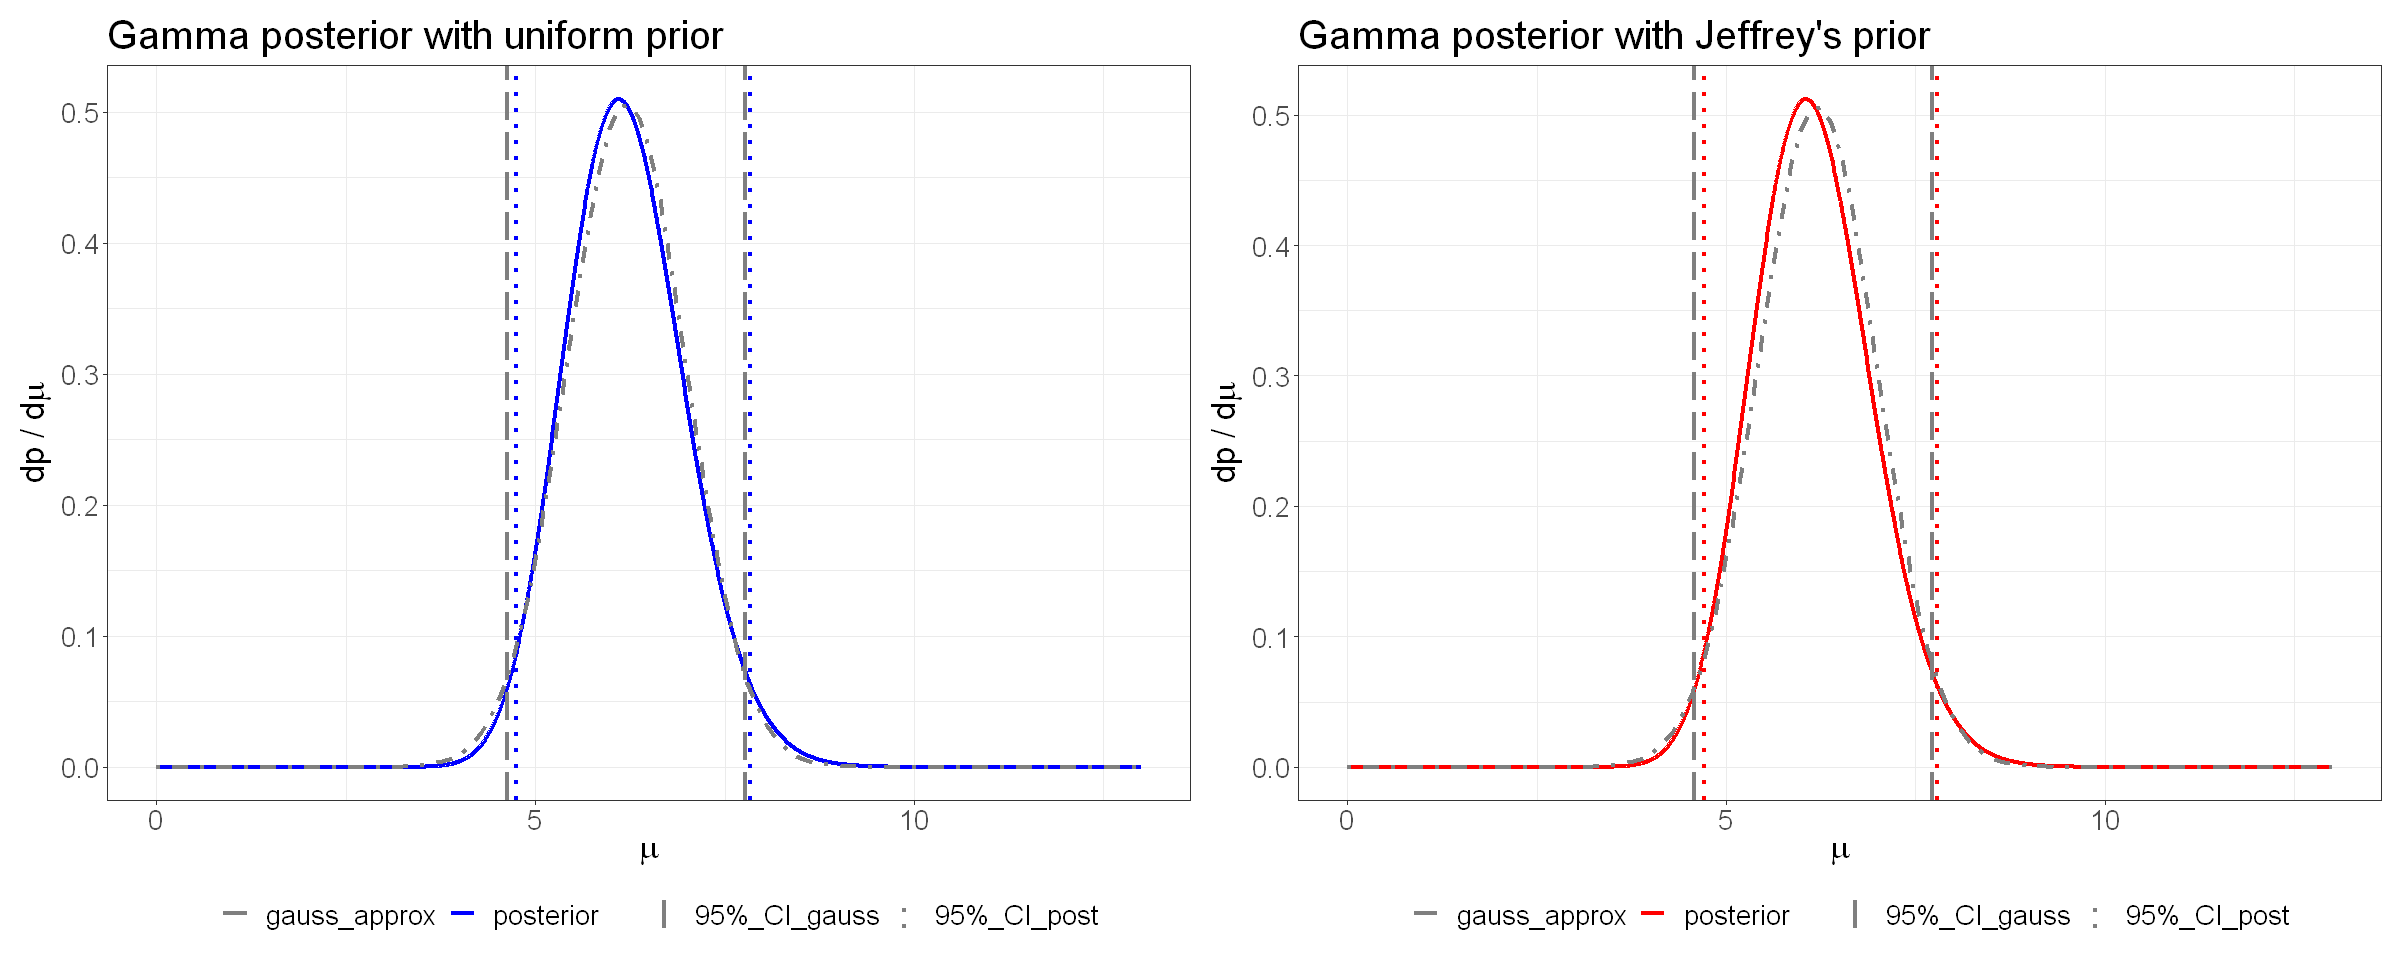

In [4]:
cols1 = c('posterior' = 'blue', 'gauss_approx' = 'grey50')
cols2 = c('posterior' = 'red', 'gauss_approx' = 'grey50')
lintp = c('95%_CI_post' = 9, '95%_CI_gauss' = 5)
p1 = ggplot() + theme_bw() +
    geom_line(aes(x = mu, y = post_unif, colour = 'posterior'), linewidth = 1.2) + 
    geom_vline(aes(xintercept = lower_unif, linetype = '95%_CI_post'), colour = 'blue', linewidth = 1.2) +
    geom_vline(aes(xintercept = upper_unif, linetype = '95%_CI_post'), colour = 'blue', linewidth = 1.2) +
    geom_vline(aes(xintercept = lower_unif_g, linetype = '95%_CI_gauss'), colour = 'grey50', linewidth = 1.2) +
    geom_vline(aes(xintercept = upper_unif_g, linetype = '95%_CI_gauss'), colour = 'grey50', linewidth = 1.2) +
    stat_function(aes(colour = 'gauss_approx'), linetype = 4, linewidth = 1.2, fun = dnorm, args = list(mean = mean_unif, sd = variance_unif ** (1/2))) + 
    scale_color_manual(name = '', values = cols1) + 
    scale_linetype_manual(name = '', values = lintp) + 
    labs(x = expression(mu), y = expression(paste('dp / d', mu, sep = '')), title = 'Gamma posterior with uniform prior') +
    # geom_text(aes(x = c(lower_unif - 0.3, upper_unif + 0.3), label = c(format(lower_unif, digits = 2), format(upper_unif, digits = 2)), y = 0.45), angle = 90, size = 6) +
    theme(text = element_text(size = 20), legend.direction = 'horizontal', legend.position = 'bottom')

p2 = ggplot() + theme_bw() +
    geom_line(aes(x = mu, y = post_jeff, colour = 'posterior'), linewidth = 1.2) + 
    geom_vline(aes(xintercept = lower_jeff, linetype = '95%_CI_post'), colour = 'red', linewidth = 1.2) +
    geom_vline(aes(xintercept = upper_jeff, linetype = '95%_CI_post'), colour = 'red', linewidth = 1.2) +
    geom_vline(aes(xintercept = lower_jeff_g, linetype = '95%_CI_gauss'), colour = 'grey50', linewidth = 1.2) +
    geom_vline(aes(xintercept = upper_jeff_g, linetype = '95%_CI_gauss'), colour = 'grey50', linewidth = 1.2) +
    stat_function(aes(colour = 'gauss_approx'), linetype = 4, linewidth = 1.2, fun = dnorm, args = list(mean = mean_unif, sd = variance_unif ** (1/2))) + 
    scale_color_manual(name = '', values = cols2) + 
    scale_linetype_manual(name = '', values = lintp) + 
    labs(x = expression(mu), y = expression(paste('dp / d', mu, sep = '')), title = 'Gamma posterior with Jeffrey\'s prior') +
    # geom_text(aes(x = c(lower_jeff - 0.3, upper_jeff + 0.3), label = c(format(lower_jeff, digits = 2), format(upper_jeff, digits = 2)), y = 0.45), angle = 90, size = 6) +
    theme(text = element_text(size = 20), legend.direction = 'horizontal', legend.position = 'bottom')

options(repr.plot.width=20, repr.plot.height=8)
p1 + p2

# Exercise 2

A well established and diffused method for detecting a disease in blood fails to detect the presence of disease in 15% of the patients that actually have the disease. A young UniPD startUp has developed an innovative method of screening. During the qualification phase, a random sample of $n=75$ patients known to have the disease is screened using the new method.

## Request (a)

What is the probability distribution of $y$, the number of times the new method fails to detect the disease?

Since also the new methon will have a failure probability, the distribution of $y$ is Binomial. In other words the number of failures of the new screening mwthod within a random sample of patients will follow a Binomial distribution with $p = p_{fail}$.

## Request (b)

On the $n=75$ patients sample, the new method fails to detect the disease in $y=6$ cases. What is the frequentist estimator of the failure probability of the new method ?

In [5]:
n = 75
y = 6

# unbiased frequentist estimator
p_freq = y / n
cat('The frequentist estimator for p is y / n = ', format(p_freq, digits = 3), sep = '', '\n')

The frequentist estimator for p is y / n = 0.08


## Request (c)

Setup a bayesian computation of the posterior probability, assuming a beta distribution with mean value 0.15 and standard deviation 0.14. Plot the posterior distribution for $y$, and mark on the plot the mean value and the variance.

-------- BETA POSTERIOR FROM BETA(0.15, 0.14) PRIOR --------
mean: 6.13
variance: 5.53


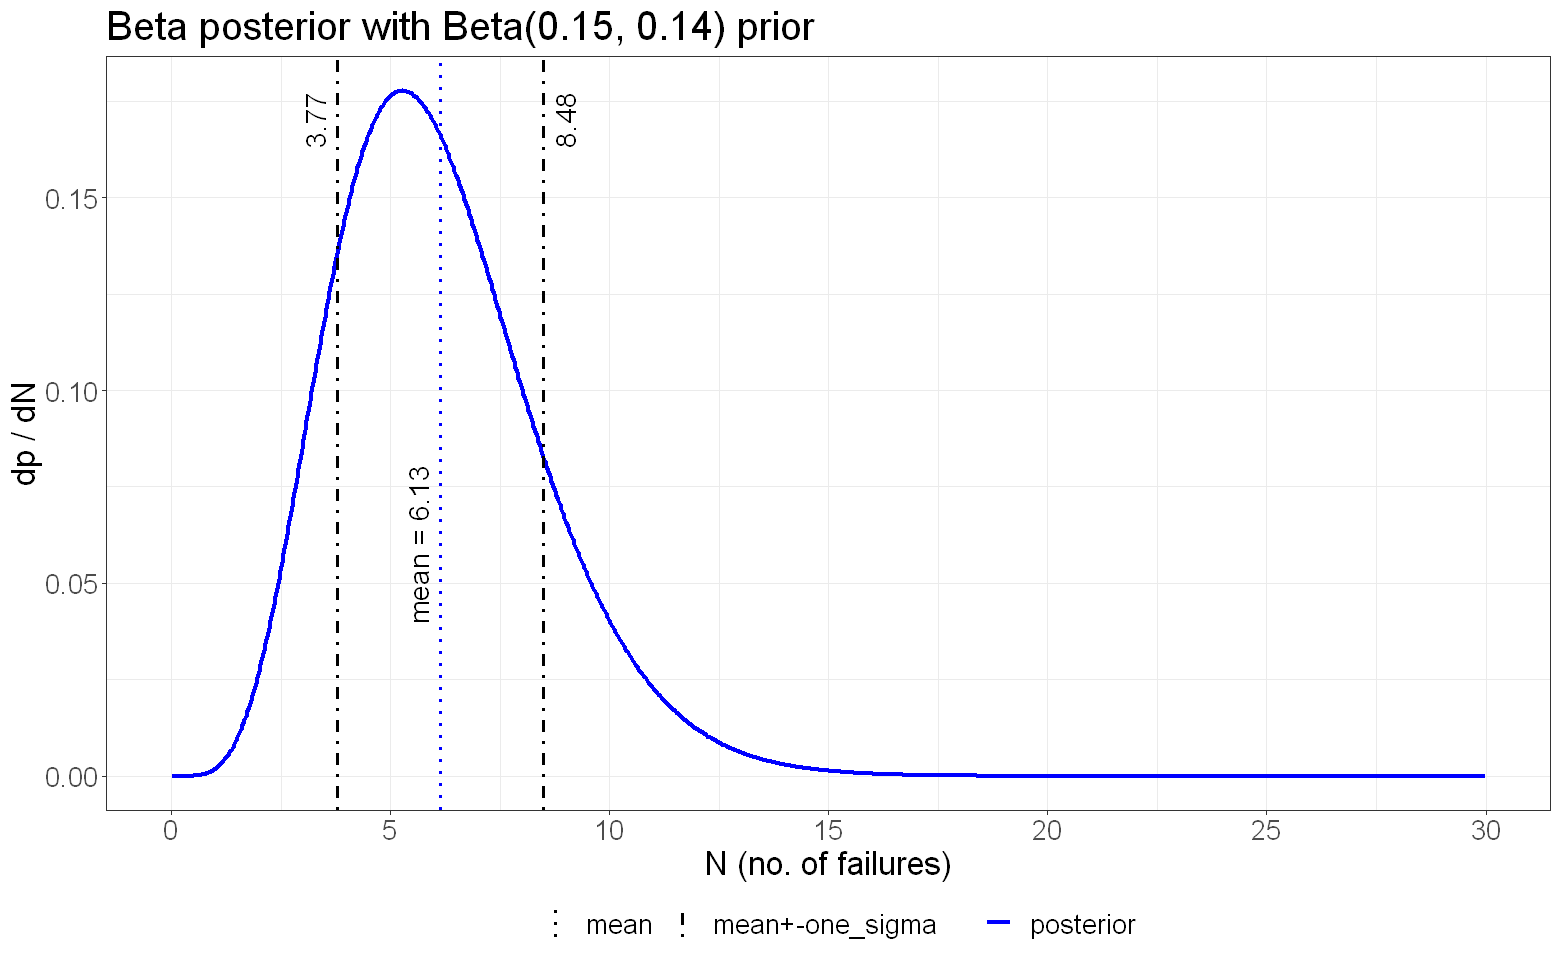

In [6]:
alpha = 0.15
beta = 0.14

p = seq(from = 1e-4, to = 1, length.out = 2000)
delta_p = p[2] - p[1]
post = dbeta(p, alpha + y, beta + n - y)
mean_post = sum(p * post) * delta_p
variance_post = sum((p - mean_post) ** 2 * post) * delta_p

cat('-------- BETA POSTERIOR FROM BETA(0.15, 0.14) PRIOR --------\n')
cat('mean: ', format(mean_post * n, digits = 3), sep = '', '\n')
cat('variance: ', format((sqrt(variance_post) * n) ** 2, digits = 3), sep = '', '\n')

limit = 800
cols = c('posterior' = 'blue')
lintp = c('mean' = 3, 'mean+-one_sigma' = 4)
options(repr.plot.width=13, repr.plot.height=8)

# we want the distribution of failures on a sample of 75 trials
pn = p * n
d_n = pn[2] - pn[1]
post_renorn = post / sum(post * d_n) # renormalize the posterior to fit the new x-axis
x_ax = 0:floor(max(pn[1:limit+3])) # create x_ax vector for xticklabels

p1 = ggplot() + theme_bw() +
    geom_line(aes(x = p[1:limit] * n, y = post_renorn[1:limit], colour = 'posterior'), linewidth = 1.3) + 
    geom_vline(aes(xintercept = mean_post * n, linetype = 'mean'), colour = 'blue', linewidth = 1) +
    geom_vline(aes(xintercept = c((mean_post - sqrt(variance_post)) * n, (mean_post + sqrt(variance_post)) * n), linetype = 'mean+-one_sigma'), linewidth = 1) +
    scale_color_manual(name = '', values = cols) + 
    scale_linetype_manual(name = '', values = lintp) +
    scale_x_continuous(breaks = x_ax[which(x_ax %% 5 == 0)]) + 
    labs(x = 'N (no. of failures)', y = 'dp / dN', title = 'Beta posterior with Beta(0.15, 0.14) prior') +
    geom_text(aes(x = (mean_post - sqrt(variance_post)) * n - 0.5, label = format((mean_post - sqrt(variance_post)) * n, digits = 3), y = 0.17), angle = 90, size = 6) +
    geom_text(aes(x = (mean_post + sqrt(variance_post)) * n + 0.5, label = format((mean_post + sqrt(variance_post)) * n, digits = 3), y = 0.17), angle = 90, size = 6) +
    geom_text(aes(x = mean_post * n - 0.5, label = paste('mean =', format(mean_post * n, digits = 3)), y = 0.06), angle = 90, size = 6) +
    theme(text = element_text(size = 20), legend.direction = 'horizontal', legend.position = 'bottom')
p1

## Request (d)

Perform a test of hypothesis assuming that if the probability of failing to the detect the desease in ill patients is greater or equal than 15%, the new test is no better that the traditional method. Test the sample at a 5% level of significance in the Bayesian way.

The posterior probability of the null hypothesis is 0.02881
and so it is possible to reject the null hypothesis.


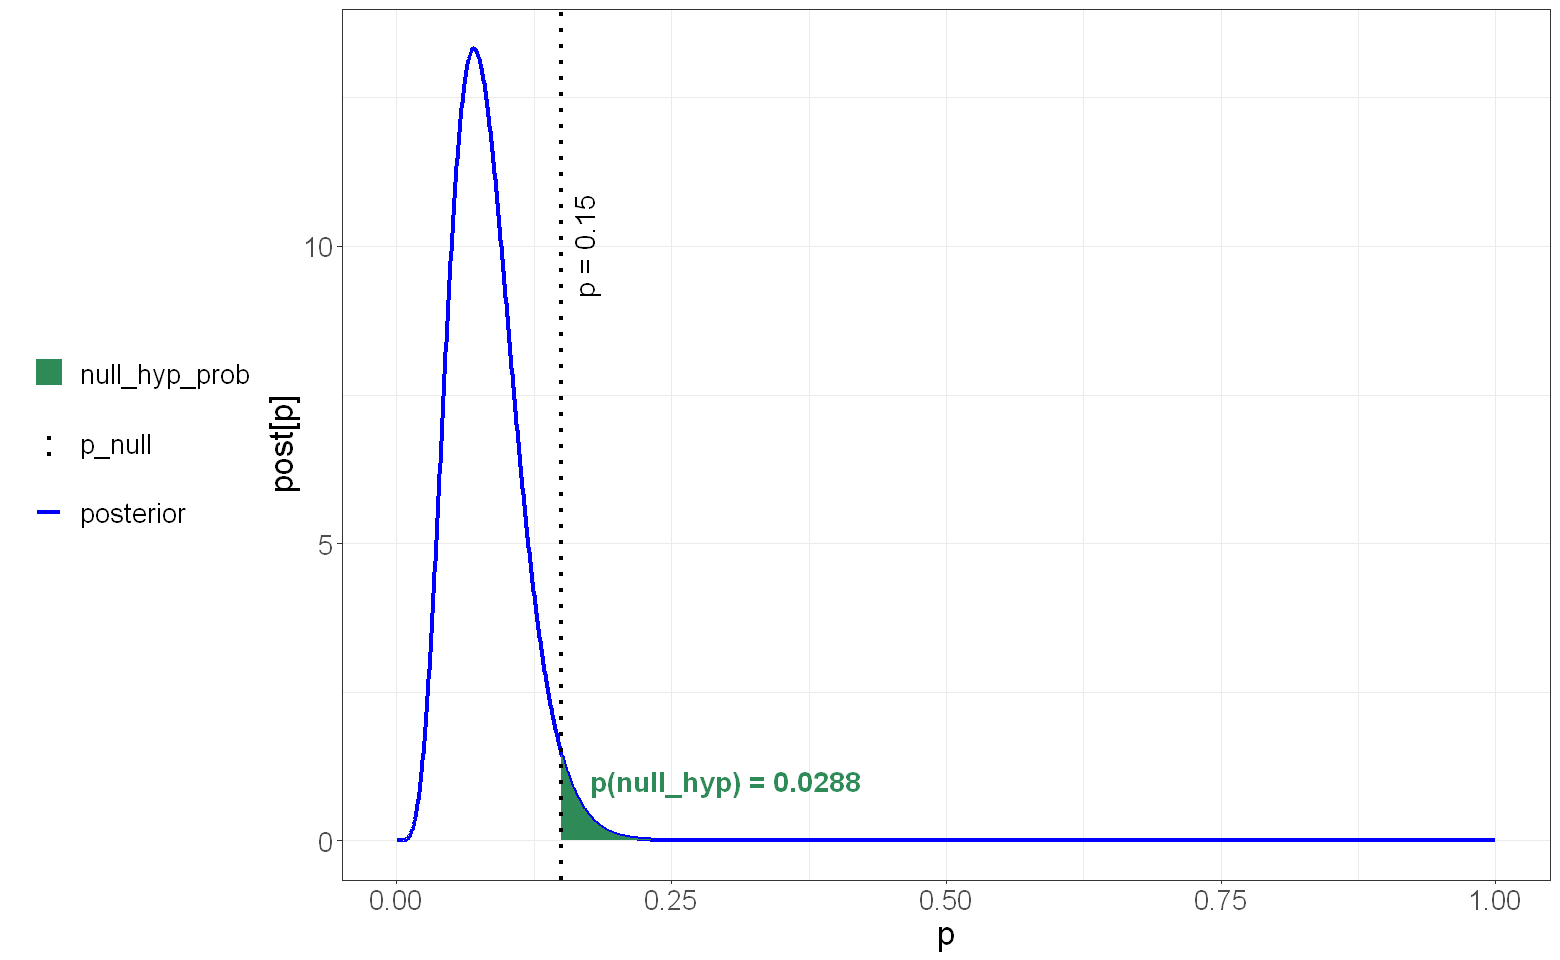

In [7]:
# bayesian significance test: evaluate posterior probability of the null hypothesis
p_null = 0.15 # null hypothesis: the failure probability of the new test p_fail is >= 0.15

p_p_null = pbeta(q = p_null, shape1 = alpha + y, shape2 = beta + n - y, lower.tail = FALSE) # evaluating probability that p_fail >= 0.15 from the posterior

cat('The posterior probability of the null hypothesis is ', format(p_p_null, digits = 4), 
'\nand so it is possible to reject the null hypothesis.', sep = '', '\n')

cols = c('posterior' = 'blue', 'null_hyp_prob' = 'seagreen')
lintp = c('p_null' = 3)
p1 = ggplot() + theme_bw() + 
    geom_line(aes(x = p, y = post, colour = 'posterior'), linewidth = 1.3) + 
    geom_ribbon(aes(x = p[which(p >= p_null)], ymin = 0, ymax = post[which(p >= p_null)], , fill = 'null_hyp_prob')) + 
    geom_vline(aes(xintercept = p_null, linetype = 'p_null'), linewidth = 1.2) +
    scale_color_manual(name = '', values = cols) + 
    scale_linetype_manual(name = '', values = lintp) + 
    scale_fill_manual(name = '', values = cols) +
    geom_text(aes(x = p_null + 0.02, label = paste('p =', p_null), y = 10), angle = 90, size = 6) +
    geom_text(aes(x = p_null + 0.15, label = paste('p(null_hyp) =', format(p_p_null, digits = 3)), y = 1, fontface = 'bold'), size = 6, colour = 'seagreen') +
    labs(y = 'post[p]') +
    theme(text = element_text(size = 20), legend.direction = 'horizontal', legend.position = 'left')
p1

## Request (e)

Perform the same hypothesis test in the classical frequentist way.

The probability of observing a number of failures smaller or equan than 6
given the null hypothesis distribution Binom(n = 75, p = 0.15) is 0.0543533. 
This means that our test statistics lies in the acceptance region and so we do not reject the null hypothesis.


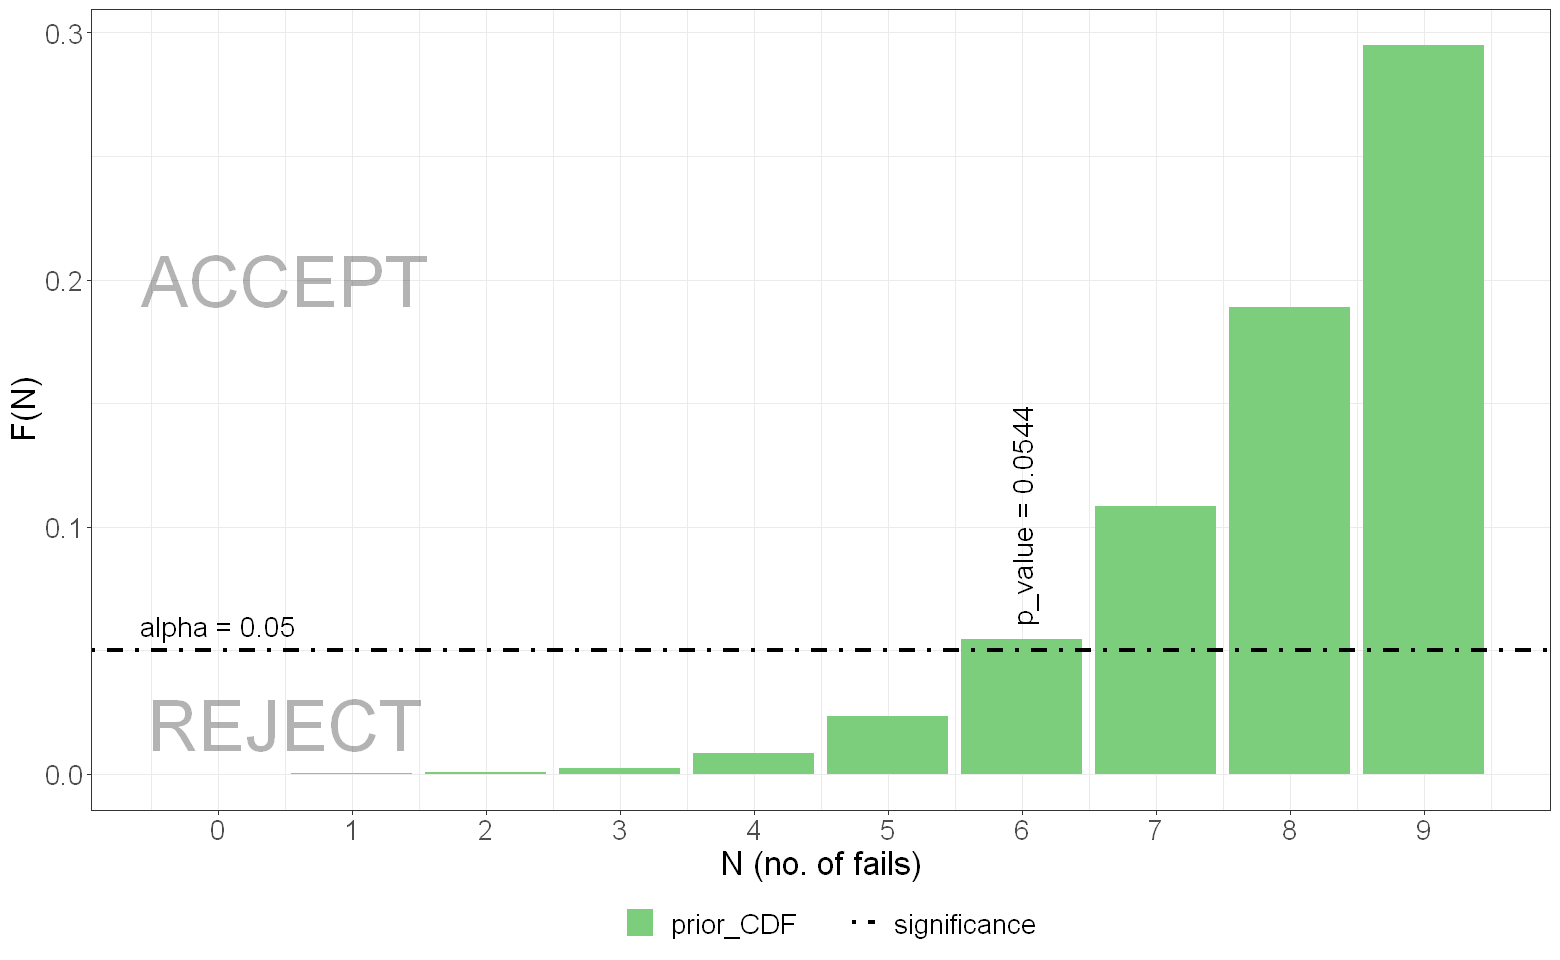

In [8]:
# frequentist hypothesis testing
s_level = 0.05
x = 0:23
dist = dbinom(x = x, size = n, prob = p_null)
probs = pbinom(q = x, size = n, prob = p_null) # null hypothesis CDF 

cat('The probability of observing a number of failures smaller or equan than ', y, 
'\ngiven the null hypothesis distribution Binom(n = ', n, ', p = ', p_null, 
') is ', probs[y + 1], 
'. \nThis means that our test statistics lies in the acceptance region and so we do not reject the null hypothesis.',
sep = '', '\n')

limit = 10
cols = c('prior_CDF' = 'palegreen3')
lintp = c('significance' = 4)
p1 = ggplot() + theme_bw() +
    geom_bar(aes(x = x[1:limit], y = probs[1:limit], fill = 'prior_CDF'), stat = 'identity') +
    geom_hline(aes(yintercept = s_level, linetype = 'significance'), linewidth = 1.2) +
    scale_x_continuous(breaks = x[1:limit]) +
    scale_linetype_manual(name = '', values = lintp) + 
    scale_fill_manual(name = '', values = cols) +
    geom_text(aes(x = 0, label = 'alpha = 0.05', y = 0.06), size = 6) +
    geom_text(aes(x = 6, label = paste('p_value =', format(probs[y + 1], digits = 3)), y = probs[y + 1] + 0.05), angle = 90, size = 6) +
    geom_text(aes(x = 0 + 0.5, label = 'ACCEPT', y = 0.2), size = 15, alpha = 0.3) +
    geom_text(aes(x = 0 + 0.5, label = 'REJECT', y = 0.02), size = 15, alpha = 0.3) +
    labs(x = 'N (no. of fails)', y = 'F(N)') +
    theme(text = element_text(size = 20), legend.direction = 'horizontal', legend.position = 'bottom')
p1

# Exercise 3

Given the problem of the lightouse discussed last week, study the case in which both the position along the shore ($\alpha$) and the distance out at sea ($\beta$) are unknown.

In this cell we setup the problem and build the parameter grid needed for performing the inference.

In [9]:
alpha_true = 1.0
beta_true = 1.0
x_min = -8
x_max = 8


# first define the value of alpha and beta needed to build a grid
n_points = 300
alphas = seq(from = x_min, to = x_max, length.out = n_points)
d_a = alphas[2] - alphas[1]
betas = seq(from = 1e-4, to = 3, length.out = n_points)
d_b = betas[2] - betas[1]

grid = expand.grid(alphas, betas)
grid = as_tibble(grid) # embed the grid on a tibble
grid = grid %>% rename('alpha' = 'Var1', 'beta' = 'Var2')

# generate fake data from a cauchy distribion and slice the total 
# amount of data with certain percentages in order to see how the inference
# changes as we use more data points
n_data = 150
data = rcauchy(n = n_data, location = alpha_true, scale = beta_true)
n_used = n_data * c(0.04, 0.1, 0.2, 0.5, 0.7, 1.0)

Here, for each point of the grid we evaluate the normalized posterior probability in function of $\alpha$ and $\beta$

In [10]:
log_p_gridvalues = rep(0, nrow(grid))

for (j in 1:length(n_used)) {
    data_used = data[1:n_used[j]]
    for (i in 1:nrow(grid)) {
        params = grid[i,] %>% unlist(use.names = F)
        log_p = 0.0
        for (x in data_used) {
            log_p = log_p + log(params[2]) - log(params[2] ** 2 + (x - params[1]) ** 2)
        }
        log_p_gridvalues[i] = log_p
    }
    grid = grid %>% mutate(log_p = log_p_gridvalues) %>% mutate(p_star = exp(log_p)) %>% mutate(z = p_star / sum(p_star * d_a * d_b))
    grid = grid %>% rename_with(~paste0('p_post_', n_used[j]), starts_with('z'))
    grid = grid %>% select(-c(log_p, p_star))
}

Display the obtained grid: apart from the first two columns, each column contains the normalized posterior probability for each number of data samples employed.

In [11]:
head(grid)
tail(grid)

alpha,beta,p_post_6,p_post_15,p_post_30,p_post_75,p_post_105,p_post_150
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-8.000000,1e-04,3.015479e-34,1.738472e-83,9.769456e-164,0,0,0
-7.946488,1e-04,3.234619e-34,2.069742e-83,1.401572e-163,0,0,0
-7.892977,1e-04,3.471173e-34,2.466733e-83,2.015636e-163,0,0,0
-7.839465,1e-04,3.726645e-34,2.943006e-83,2.905864e-163,0,0,0
-7.785953,1e-04,4.002679e-34,3.515032e-83,4.199731e-163,0,0,0
-7.732441,1e-04,4.301076e-34,4.202834e-83,6.085087e-163,0,0,0


alpha,beta,p_post_6,p_post_15,p_post_30,p_post_75,p_post_105,p_post_150
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
7.732441,3,1.029669e-05,4.081507e-12,1.289389e-23,4.008045e-55,2.636159e-76,3.765602e-111
7.785953,3,9.460883e-06,3.306740e-12,8.699439e-24,1.593831e-55,7.221853e-77,5.979695e-112
7.839465,3,8.696567e-06,2.681675e-12,5.880585e-24,6.362863e-56,1.988060e-77,9.566423e-113
7.892977,3,7.997350e-06,2.176908e-12,3.982645e-24,2.550175e-56,5.499456e-78,1.541886e-113
7.946488,3,7.357430e-06,1.768896e-12,2.702365e-24,1.026125e-56,1.528706e-78,2.503757e-114
8.000000,3,6.771544e-06,1.438778e-12,1.837117e-24,4.145220e-57,4.270174e-79,4.096123e-115


Here we show the posterior probability in function of $\alpha$ and $\beta$ with heatmaps.

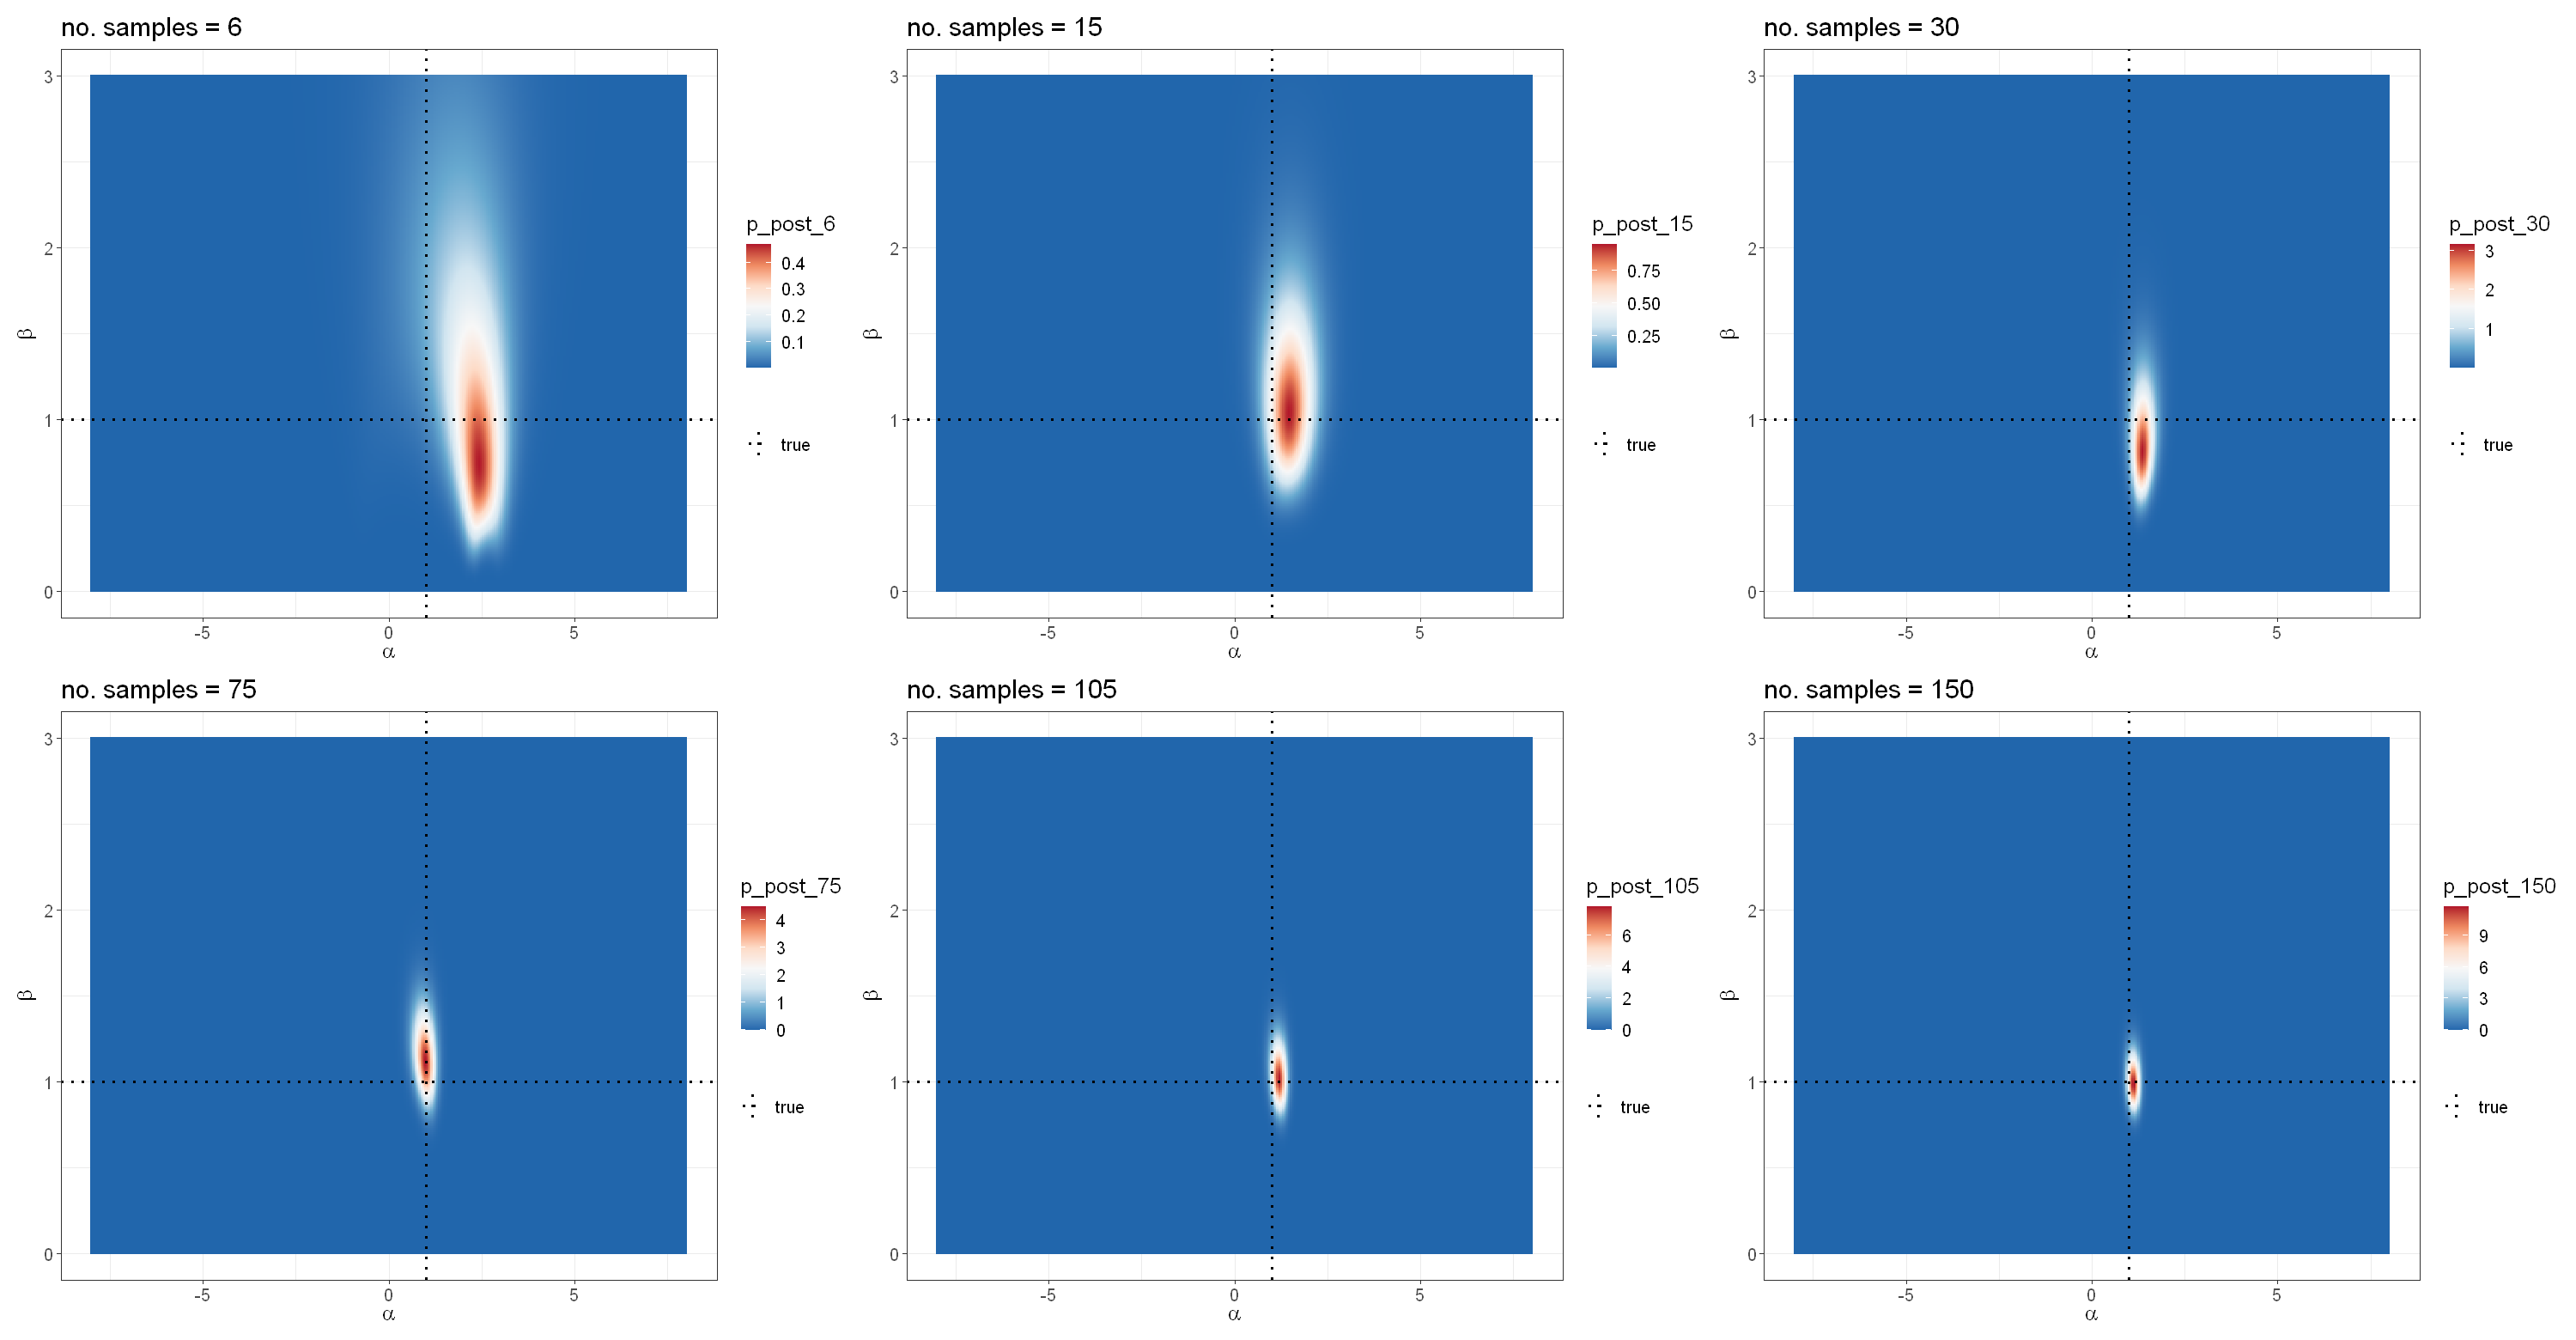

In [12]:
lintp = c('true' = 3)
p1 = ggplot(grid, aes(alpha, beta, fill = get(names(grid)[3]))) + geom_tile() + scale_fill_distiller(name = names(grid)[3], palette = "RdBu") + 
    labs(title = paste('no. samples =', n_used[1]), x = expression(alpha), y = expression(beta)) +
    geom_vline(aes(xintercept = alpha_true, linetype = 'true'), linewidth = 1.1) + 
    geom_hline(aes(yintercept = beta_true, linetype = 'true'), linewidth = 1.1) + 
    scale_linetype_manual(name = '', values = lintp) +
    theme_bw() + 
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')
p2 = ggplot(grid, aes(alpha, beta, fill = get(names(grid)[4]))) + geom_tile() + scale_fill_distiller(name = names(grid)[4], palette = "RdBu") +
    labs(title = paste('no. samples =', n_used[2]), x = expression(alpha), y = expression(beta)) +
    geom_vline(aes(xintercept = alpha_true, linetype = 'true'), linewidth = 1.1) + 
    geom_hline(aes(yintercept = beta_true, linetype = 'true'), linewidth = 1.1) + 
    scale_linetype_manual(name = '', values = lintp) +
    theme_bw() + 
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')
p3 = ggplot(grid, aes(alpha, beta, fill = get(names(grid)[5]))) + geom_tile() + scale_fill_distiller(name = names(grid)[5], palette = "RdBu") +
    labs(title = paste('no. samples =', n_used[3]), x = expression(alpha), y = expression(beta)) +
    geom_vline(aes(xintercept = alpha_true, linetype = 'true'), linewidth = 1.1) + 
    geom_hline(aes(yintercept = beta_true, linetype = 'true'), linewidth = 1.1) + 
    scale_linetype_manual(name = '', values = lintp) +
    theme_bw() + 
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')
p4 = ggplot(grid, aes(alpha, beta, fill = get(names(grid)[6]))) + geom_tile() + scale_fill_distiller(name = names(grid)[6], palette = "RdBu") +
    labs(title = paste('no. samples =', n_used[4]), x = expression(alpha), y = expression(beta)) +
    geom_vline(aes(xintercept = alpha_true, linetype = 'true'), linewidth = 1.1) + 
    geom_hline(aes(yintercept = beta_true, linetype = 'true'), linewidth = 1.1) + 
    scale_linetype_manual(name = '', values = lintp) +
    theme_bw() + 
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')
p5 = ggplot(grid, aes(alpha, beta, fill = get(names(grid)[7]))) + geom_tile() + scale_fill_distiller(name = names(grid)[7], palette = "RdBu") +
    labs(title = paste('no. samples =', n_used[5]), x = expression(alpha), y = expression(beta)) +
    geom_vline(aes(xintercept = alpha_true, linetype = 'true'), linewidth = 1.1) + 
    geom_hline(aes(yintercept = beta_true, linetype = 'true'), linewidth = 1.1) + 
    scale_linetype_manual(name = '', values = lintp) +
    theme_bw() + 
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')
p6 = ggplot(grid, aes(alpha, beta, fill = get(names(grid)[8]))) + geom_tile() + scale_fill_distiller(name = names(grid)[8], palette = "RdBu") +
    labs(title = paste('no. samples =', n_used[6]), x = expression(alpha), y = expression(beta)) +
    geom_vline(aes(xintercept = alpha_true, linetype = 'true'), linewidth = 1.1) + 
    geom_hline(aes(yintercept = beta_true, linetype = 'true'), linewidth = 1.1) +
    scale_linetype_manual(name = '', values = lintp) +
    theme_bw() + 
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')

options(repr.plot.width = 25, repr.plot.height = 13)
p1 + p2 + p3 + p4 + p5 + p6

Here we marginalize the posterior probabilities both for $\alpha$ and $\beta$

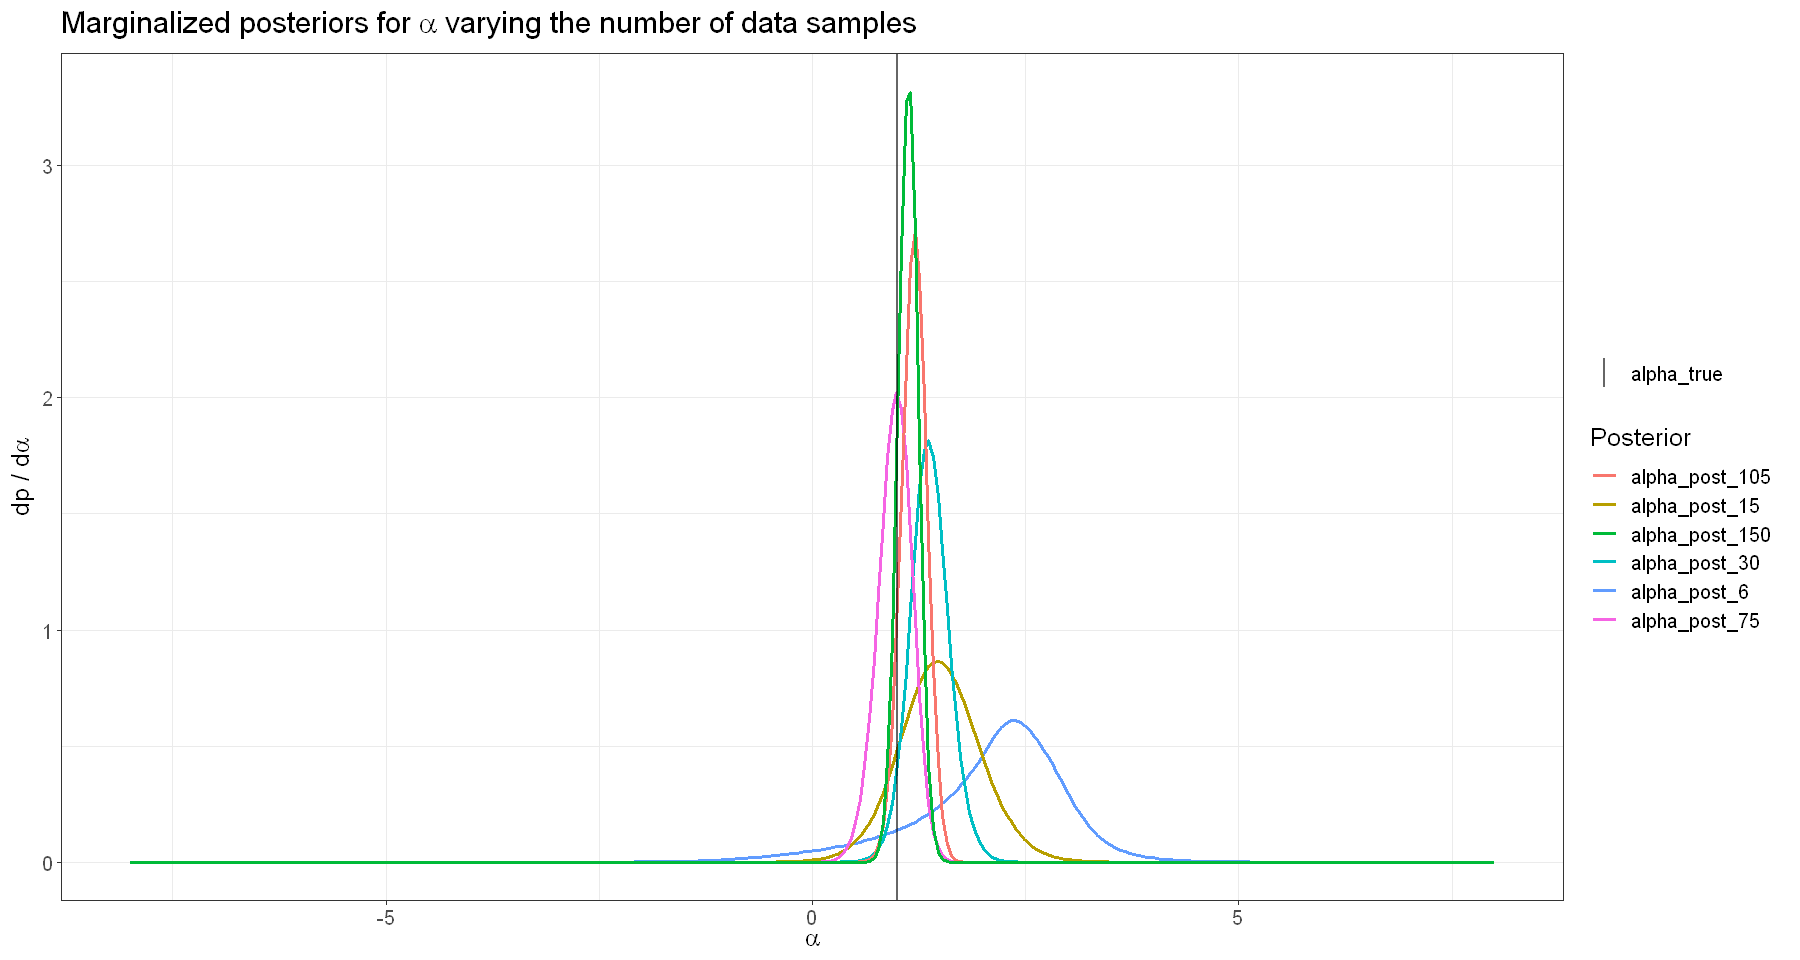

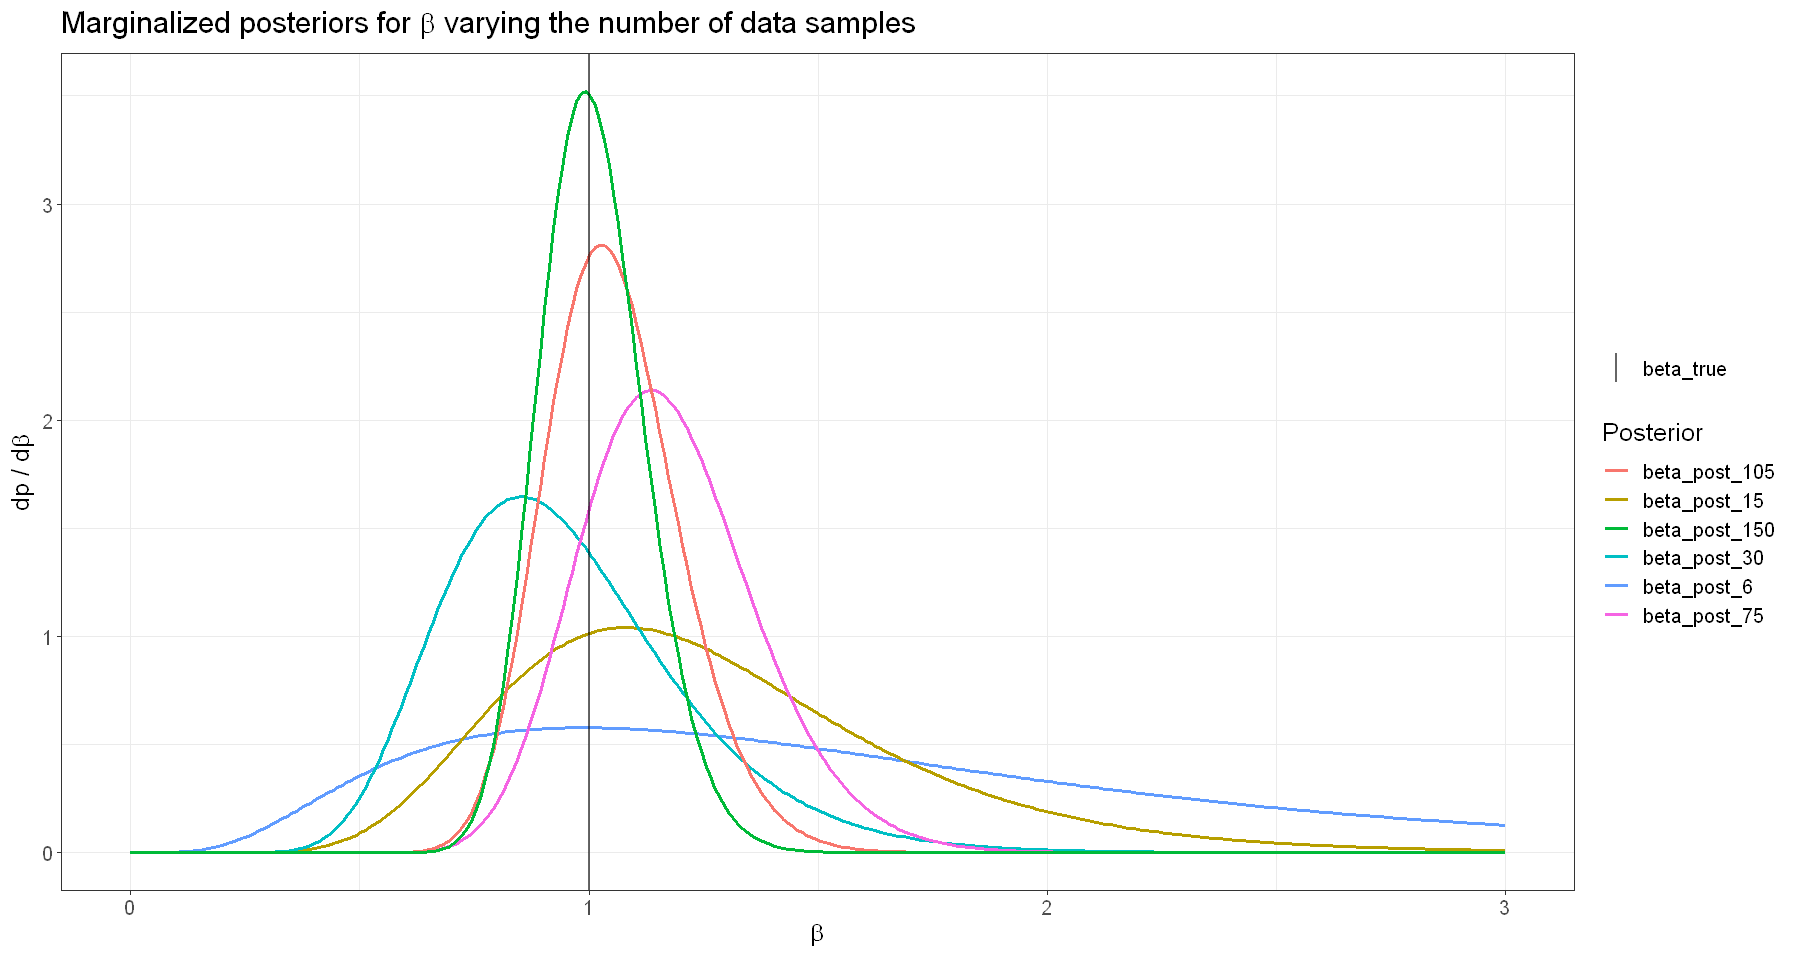

In [13]:
alpha_marg = grid %>% group_by(alpha) %>% 
    summarize(alpha_post_6 = sum(p_post_6 * d_b),
    alpha_post_15 = sum(p_post_15 * d_b),
    alpha_post_30 = sum(p_post_30 * d_b),
    alpha_post_75 = sum(p_post_75 * d_b),
    alpha_post_105 = sum(p_post_105 * d_b),
    alpha_post_150 = sum(p_post_150 * d_b))

beta_marg = grid %>% group_by(beta) %>% 
    summarize(beta_post_6= sum(p_post_6 * d_a),
    beta_post_15 = sum(p_post_15 * d_a),
    beta_post_30 = sum(p_post_30 * d_a),
    beta_post_75 = sum(p_post_75 * d_a),
    beta_post_105 = sum(p_post_105 * d_a),
    beta_post_150 = sum(p_post_150 * d_a))

options(repr.plot.width=15, repr.plot.height=8)
p1 = ggplot(data = alpha_marg) + 
    geom_line(aes(x = alpha, y = alpha_post_6, colour = 'alpha_post_6'), linewidth = 0.9) +
    geom_line(aes(x = alpha, y = alpha_post_15, colour = 'alpha_post_15'), linewidth = 0.9) +
    geom_line(aes(x = alpha, y = alpha_post_30, colour = 'alpha_post_30'), linewidth = 0.9) +
    geom_line(aes(x = alpha, y = alpha_post_75, colour = 'alpha_post_75'), linewidth = 0.9) +
    geom_line(aes(x = alpha, y = alpha_post_105, colour = 'alpha_post_105'), linewidth = 0.9) +
    geom_line(aes(x = alpha, y = alpha_post_150, colour = 'alpha_post_150'), linewidth = 0.9) +
    geom_vline(aes(xintercept = alpha_true, linetype = 'alpha_true'), linewidth = 0.7, alpha = 0.6) +
    labs(x = expression(alpha), y = expression(paste('dp / d', alpha, sep = '')), colour = 'Posterior', linetype = '', 
        title = expression(paste('Marginalized posteriors for ', alpha, ' varying the number of data samples', sep = ''))) +
    theme_bw() +
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')

p2 = ggplot(data = beta_marg) + 
    geom_line(aes(x = beta, y = beta_post_6, colour = 'beta_post_6'), linewidth = 0.9) +
    geom_line(aes(x = beta, y = beta_post_15, colour = 'beta_post_15'), linewidth = 0.9) +
    geom_line(aes(x = beta, y = beta_post_30, colour = 'beta_post_30'), linewidth = 0.9) +
    geom_line(aes(x = beta, y = beta_post_75, colour = 'beta_post_75'), linewidth = 0.9) +
    geom_line(aes(x = beta, y = beta_post_105, colour = 'beta_post_105'), linewidth = 0.9) +
    geom_line(aes(x = beta, y = beta_post_150, colour = 'beta_post_150'), linewidth = 0.9) +
    geom_vline(aes(xintercept = beta_true, linetype = 'beta_true'), linewidth = 0.7, alpha = 0.6) +
    labs(x = expression(beta), y = expression(paste('dp / d', beta, sep = '')), colour = 'Posterior', linetype = '', 
        title = expression(paste('Marginalized posteriors for ', beta, ' varying the number of data samples', sep = ''))) +
    theme_bw() +
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')

options(repr.plot.width=15, repr.plot.height=8)
p1
p2

Finally we calculate and display the most relevant features for each marginalized distribution, i.e. mode, mean value, variance and 95% credibility interval. It is possible to notice, as expected, that the marginalized distributions become more and more peaked as the number of datapoint used for the inference increases. This also could be noticed more qualitatively by looking at the previous heatmaps. Moreover the convergence to the real values is satisfactory.

no_data_samples,alpha_mode,alpha_expvalues,alpha_var,CI_95_low,CI_95_up
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,2.3812709,2.0753282,0.82221861,-0.1337793,3.558528
15,1.4715719,1.4968243,0.23354216,0.6153846,2.541806
30,1.3645485,1.3737897,0.05430269,0.9899666,1.899666
75,0.9899666,0.9675358,0.04054551,0.6153846,1.418060
105,1.2040134,1.1914974,0.02211515,0.9364548,1.525084
150,1.1505017,1.1235874,0.01414816,0.9364548,1.418060


no_data_samples,beta_mode,beta_expvalues,beta_var,CI_95_low,CI_95_up
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,0.9833448,1.4252594,0.44595711,0.4014244,2.829437
15,1.0836759,1.2649311,0.18114546,0.6221528,2.297682
30,0.8529144,0.9521596,0.07079300,0.5418880,1.575298
75,1.1338415,1.1759066,0.03678216,0.8529144,1.605398
105,1.0234773,1.0542500,0.02103133,0.8027488,1.374636
150,0.9933779,1.0101860,0.01325744,0.8127819,1.264272


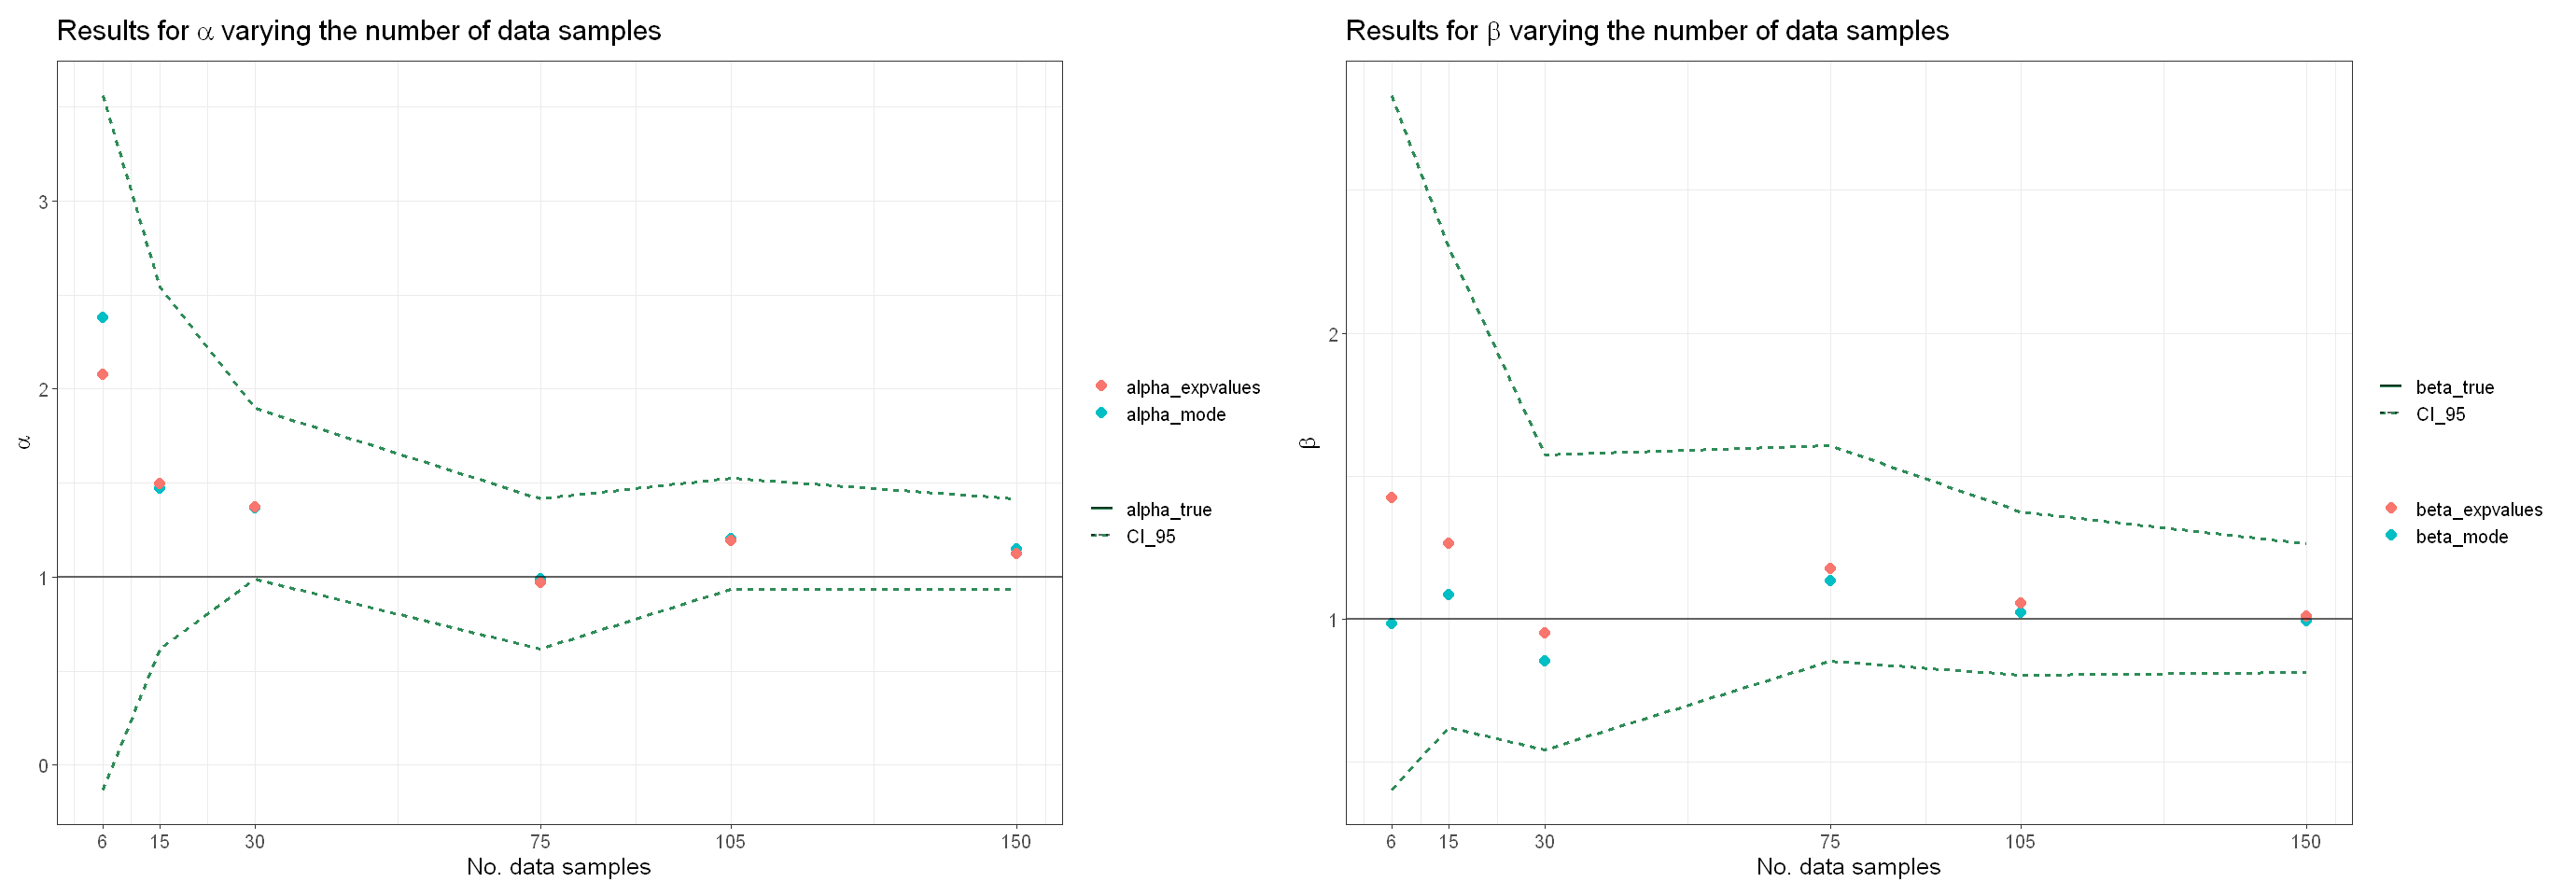

In [14]:
dist_numintegrate <- function(x, dist, space, val){  
    sum = 0
    i = 1
    while (sum < val){
        sum = sum + dist[[i]] * space
        i = i + 1
    }
    return(c(i, x[[i]]))
}

alpha_results = alpha_marg %>% 
    reframe(no_data_samples = n_used,
    alpha_mode = c(alpha[which.max(alpha_post_6)], alpha[which.max(alpha_post_15)], alpha[which.max(alpha_post_30)], 
                alpha[which.max(alpha_post_75)], alpha[which.max(alpha_post_105)], alpha[which.max(alpha_post_150)]),
    alpha_expvalues = c(sum(alpha * alpha_post_6 * d_a), sum(alpha * alpha_post_15 * d_a), sum(alpha * alpha_post_30 * d_a),
                        sum(alpha * alpha_post_75 * d_a), sum(alpha * alpha_post_105 * d_a), sum(alpha * alpha_post_150 * d_a)), 
    alpha_var = c(sum((alpha - sum(alpha * alpha_post_6 * d_a)) ** 2 * alpha_post_6 * d_a), 
                sum((alpha - sum(alpha * alpha_post_15 * d_a)) ** 2 * alpha_post_15 * d_a), 
                sum((alpha - sum(alpha * alpha_post_30 * d_a)) ** 2 * alpha_post_30 * d_a),
                sum((alpha - sum(alpha * alpha_post_75 * d_a)) ** 2 * alpha_post_75 * d_a), 
                sum((alpha - sum(alpha * alpha_post_105 * d_a)) ** 2 * alpha_post_105 * d_a), 
                sum((alpha - sum(alpha * alpha_post_150 * d_a)) ** 2 * alpha_post_150 * d_a)), 
    CI_95_low = c(dist_numintegrate(alpha, alpha_post_6, d_a, 0.025)[2], dist_numintegrate(alpha, alpha_post_15, d_a, 0.025)[2], dist_numintegrate(alpha, alpha_post_30, d_a, 0.025)[2],
                dist_numintegrate(alpha, alpha_post_75, d_a, 0.025)[2], dist_numintegrate(alpha, alpha_post_105, d_a, 0.025)[2], dist_numintegrate(alpha, alpha_post_150, d_a, 0.025)[2]),
    CI_95_up = c(dist_numintegrate(alpha, alpha_post_6, d_a, 0.975)[2], dist_numintegrate(alpha, alpha_post_15, d_a, 0.975)[2], dist_numintegrate(alpha, alpha_post_30, d_a, 0.975)[2],
                dist_numintegrate(alpha, alpha_post_75, d_a, 0.975)[2], dist_numintegrate(alpha, alpha_post_105, d_a, 0.975)[2], dist_numintegrate(alpha, alpha_post_150, d_a, 0.975)[2]))

alpha_results

p1 = ggplot(data = alpha_results) +
    geom_point(aes(x = no_data_samples, y = alpha_mode, colour = 'alpha_mode'), shape = 16, size = 3) +
    geom_point(aes(x = no_data_samples, y = alpha_expvalues, colour = 'alpha_expvalues'), shape = 16, size = 3) +
    geom_line(aes(x = no_data_samples, y = CI_95_low, linetype = 'CI_95'), colour = 'seagreen', linewidth = 0.9) +
    geom_line(aes(x = no_data_samples, y = CI_95_up, linetype = 'CI_95'), colour = 'seagreen', linewidth = 0.9) +
    geom_hline(aes(yintercept = alpha_true, linetype = 'alpha_true'), linewidth = 0.7, alpha = 0.6) +
    scale_x_continuous(breaks = n_used) + 
    labs(x = 'No. data samples', y = expression(alpha), colour = '', shape = '', linetype = '', 
        title = expression(paste('Results for ', alpha, ' varying the number of data samples', sep = ''))) +
    theme_bw() +
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')

beta_results = beta_marg %>% 
    reframe(no_data_samples = n_used,
    beta_mode = c(beta[which.max(beta_post_6)], beta[which.max(beta_post_15)], beta[which.max(beta_post_30)], 
                beta[which.max(beta_post_75)], beta[which.max(beta_post_105)], beta[which.max(beta_post_150)]),
    beta_expvalues = c(sum(beta * beta_post_6 * d_b), sum(beta * beta_post_15 * d_b), sum(beta * beta_post_30 * d_b),
                        sum(beta * beta_post_75 * d_b), sum(beta * beta_post_105 * d_b), sum(beta * beta_post_150 * d_b)), 
    beta_var = c(sum((beta - sum(beta * beta_post_6 * d_b)) ** 2 * beta_post_6 * d_b), 
                sum((beta - sum(beta * beta_post_15 * d_b)) ** 2 * beta_post_15 * d_b), 
                sum((beta - sum(beta * beta_post_30 * d_b)) ** 2 * beta_post_30 * d_b),
                sum((beta - sum(beta * beta_post_75 * d_b)) ** 2 * beta_post_75 * d_b), 
                sum((beta - sum(beta * beta_post_105 * d_b)) ** 2 * beta_post_105 * d_b), 
                sum((beta - sum(beta * beta_post_150 * d_b)) ** 2 * beta_post_150 * d_b)), 
    CI_95_low = c(dist_numintegrate(beta, beta_post_6, d_b, 0.025)[2], dist_numintegrate(beta, beta_post_15, d_b, 0.025)[2], dist_numintegrate(beta, beta_post_30, d_b, 0.025)[2],
                dist_numintegrate(beta, beta_post_75, d_b, 0.025)[2], dist_numintegrate(beta, beta_post_105, d_b, 0.025)[2], dist_numintegrate(beta, beta_post_150, d_b, 0.025)[2]),
    CI_95_up = c(dist_numintegrate(beta, beta_post_6, d_b, 0.975)[2], dist_numintegrate(beta, beta_post_15, d_b, 0.975)[2], dist_numintegrate(beta, beta_post_30, d_b, 0.975)[2],
                dist_numintegrate(beta, beta_post_75, d_b, 0.975)[2], dist_numintegrate(beta, beta_post_105, d_b, 0.975)[2], dist_numintegrate(beta, beta_post_150, d_b, 0.975)[2]))

beta_results

p2 = ggplot(data = beta_results) +
    geom_point(aes(x = no_data_samples, y = beta_mode, colour = 'beta_mode'), shape = 16, size = 3) +
    geom_point(aes(x = no_data_samples, y = beta_expvalues, colour = 'beta_expvalues'), shape = 16, size = 3) +
    geom_line(aes(x = no_data_samples, y = CI_95_low, linetype = 'CI_95'), colour = 'seagreen', linewidth = 0.9) +
    geom_line(aes(x = no_data_samples, y = CI_95_up, linetype = 'CI_95'), colour = 'seagreen', linewidth = 0.9) +
    geom_hline(aes(yintercept = beta_true, linetype = 'beta_true'), linewidth = 0.7, alpha = 0.6) +
    scale_x_continuous(breaks = n_used) + 
    labs(x = 'No. data samples', y = expression(beta), colour = '', shape = '', linetype = '', 
        title = expression(paste('Results for ', beta, ' varying the number of data samples', sep = ''))) +
    theme_bw() +
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')

options(repr.plot.width=23, repr.plot.height=8)
p1 + p2

# Exercise 4

Given the Signal over Background example discussed last week, analyze and discuss the following cases:

## Request (a)

Vary the sampling resolution of used to generate the data, keeping the same sampling range:
- change the resolution $w=\{0.1,0.25,1,2,3\}$
- Check the effect on the results

Here we setup the problem and simulate data in the required conditions.

In [15]:
x0 = 0
w_values = c(0.1, 0.25, 1, 2, 3)
A_true = 2
B_true = 1
delta_t = 5
x_low = -7
x_up = 7

signal = function(x, a, b, x0, w, d_t) {
    d_t * (a * exp(- (x - x0) ** 2 / (2*w ** 2)) + b)
}

# create x datapoints with the 5 required resolutions
xdat1 = seq(from = x_low, by = 0.5 * w_values[1], length.out = (x_up - x_low) / (0.5 * w_values[1]))
xdat2 = seq(from = x_low, by = 0.5 * w_values[2], length.out = (x_up - x_low) / (0.5 * w_values[2]))
xdat3 = seq(from = x_low, by = 0.5 * w_values[3], length.out = (x_up - x_low) / (0.5 * w_values[3]))
xdat4 = seq(from = x_low, by = 0.5 * w_values[4], length.out = (x_up - x_low) / (0.5 * w_values[4]))
xdat5 = seq(from = x_low, by = 0.5 * w_values[5], length.out = (x_up - x_low) / (0.5 * w_values[5]))

# generate counts for each of the previous datapoints
strue1 = signal(xdat1, A_true, B_true, x0, w_values[1], delta_t)
strue2 = signal(xdat2, A_true, B_true, x0, w_values[2], delta_t)
strue3 = signal(xdat3, A_true, B_true, x0, w_values[3], delta_t)
strue4 = signal(xdat4, A_true, B_true, x0, w_values[4], delta_t)
strue5 = signal(xdat5, A_true, B_true, x0, w_values[5], delta_t)

ddat1 = rpois(length(strue1), strue1)
ddat2 = rpois(length(strue2), strue2)
ddat3 = rpois(length(strue3), strue3)
ddat4 = rpois(length(strue4), strue4)
ddat5 = rpois(length(strue5), strue5)

Here we create the parameters grid needed for the inference

In [16]:
n_points = 100
a_params = seq(from = 0, to = 4, length.out = n_points)
d_a = a_params[2] - a_params[1]
b_params = seq(from = 0.5, to = 1.5, length.out = n_points)
d_b = b_params[2] - b_params[1]

grid = expand.grid(a_params, b_params)
grid = as_tibble(grid)
grid = grid %>% rename('a' = 'Var1', 'b' = 'Var2')
head(grid)

a,b
<dbl>,<dbl>
0.00000000,0.5
0.04040404,0.5
0.08080808,0.5
0.12121212,0.5
0.16161616,0.5
0.20202020,0.5


Here we calculate the normalized posterior for each grid datapoint and for each of the 5 resolutions required

In [17]:
log_post = function(d, x, a, b, x0, w, t) {
    if (a < 0 | b < 0) {
        return(-Inf)
    } else {
       return(sum(dpois(d, lambda = signal(x, a, b, x0, w, t), log = T)))
    }
}


for (j in 1:length(w_values)) {
    x = switch(j, xdat1, xdat2, xdat3, xdat4, xdat5)
    d = switch(j, ddat1, ddat2, ddat3, ddat4, ddat5)
    w = w_values[j]
    log_p_gridvalues = rep(0, nrow(grid))
    for (i in 1:nrow(grid)) {
        params = grid[i,] %>% unlist(use.names = F)
        log_p_gridvalues[i] = log_post(d, x, params[1], params[2], x0, w, delta_t)
    }
    grid = grid %>% mutate(log_p = log_p_gridvalues) %>% mutate(p_star = exp(log_p)) %>% mutate(z = p_star / sum(p_star * d_a * d_b))
    grid = grid %>% rename_with(~paste0('p_post_', j), starts_with('z'))
    grid = grid %>% select(-c(log_p, p_star))
}

head(grid)
tail(grid)

a,b,p_post_1,p_post_2,p_post_3,p_post_4,p_post_5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00000000,0.5,0,5.717498e-84,1.275994e-38,2.108598e-23,1.822184e-34
0.04040404,0.5,0,2.863534e-82,4.979572e-37,4.951323e-22,1.026797e-32
0.08080808,0.5,0,1.076863e-80,1.477599e-35,9.137905e-21,4.351357e-31
0.12121212,0.5,0,3.145365e-79,3.443263e-34,1.363741e-19,1.433122e-29
0.16161616,0.5,0,7.338400e-78,6.472217e-33,1.685025e-18,3.769783e-28
0.20202020,0.5,0,1.400072e-76,1.003572e-31,1.758081e-17,8.103852e-27


a,b,p_post_1,p_post_2,p_post_3,p_post_4,p_post_5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.797980,1.5,0,1.796184e-22,1.236558e-10,1.488954e-12,1.738348e-06
3.838384,1.5,0,1.184093e-22,7.853330e-11,8.998978e-13,1.184104e-06
3.878788,1.5,0,7.776075e-23,4.969489e-11,5.421241e-13,8.033761e-07
3.919192,1.5,0,5.087415e-23,3.133355e-11,3.255492e-13,5.429343e-07
3.959596,1.5,0,3.316027e-23,1.968652e-11,1.948793e-13,3.655085e-07
4.000000,1.5,0,2.153499e-23,1.232566e-11,1.162958e-13,2.451273e-07


Here we display the posteriors with heatmaps. Each heatmap corresponds to a particular resolution

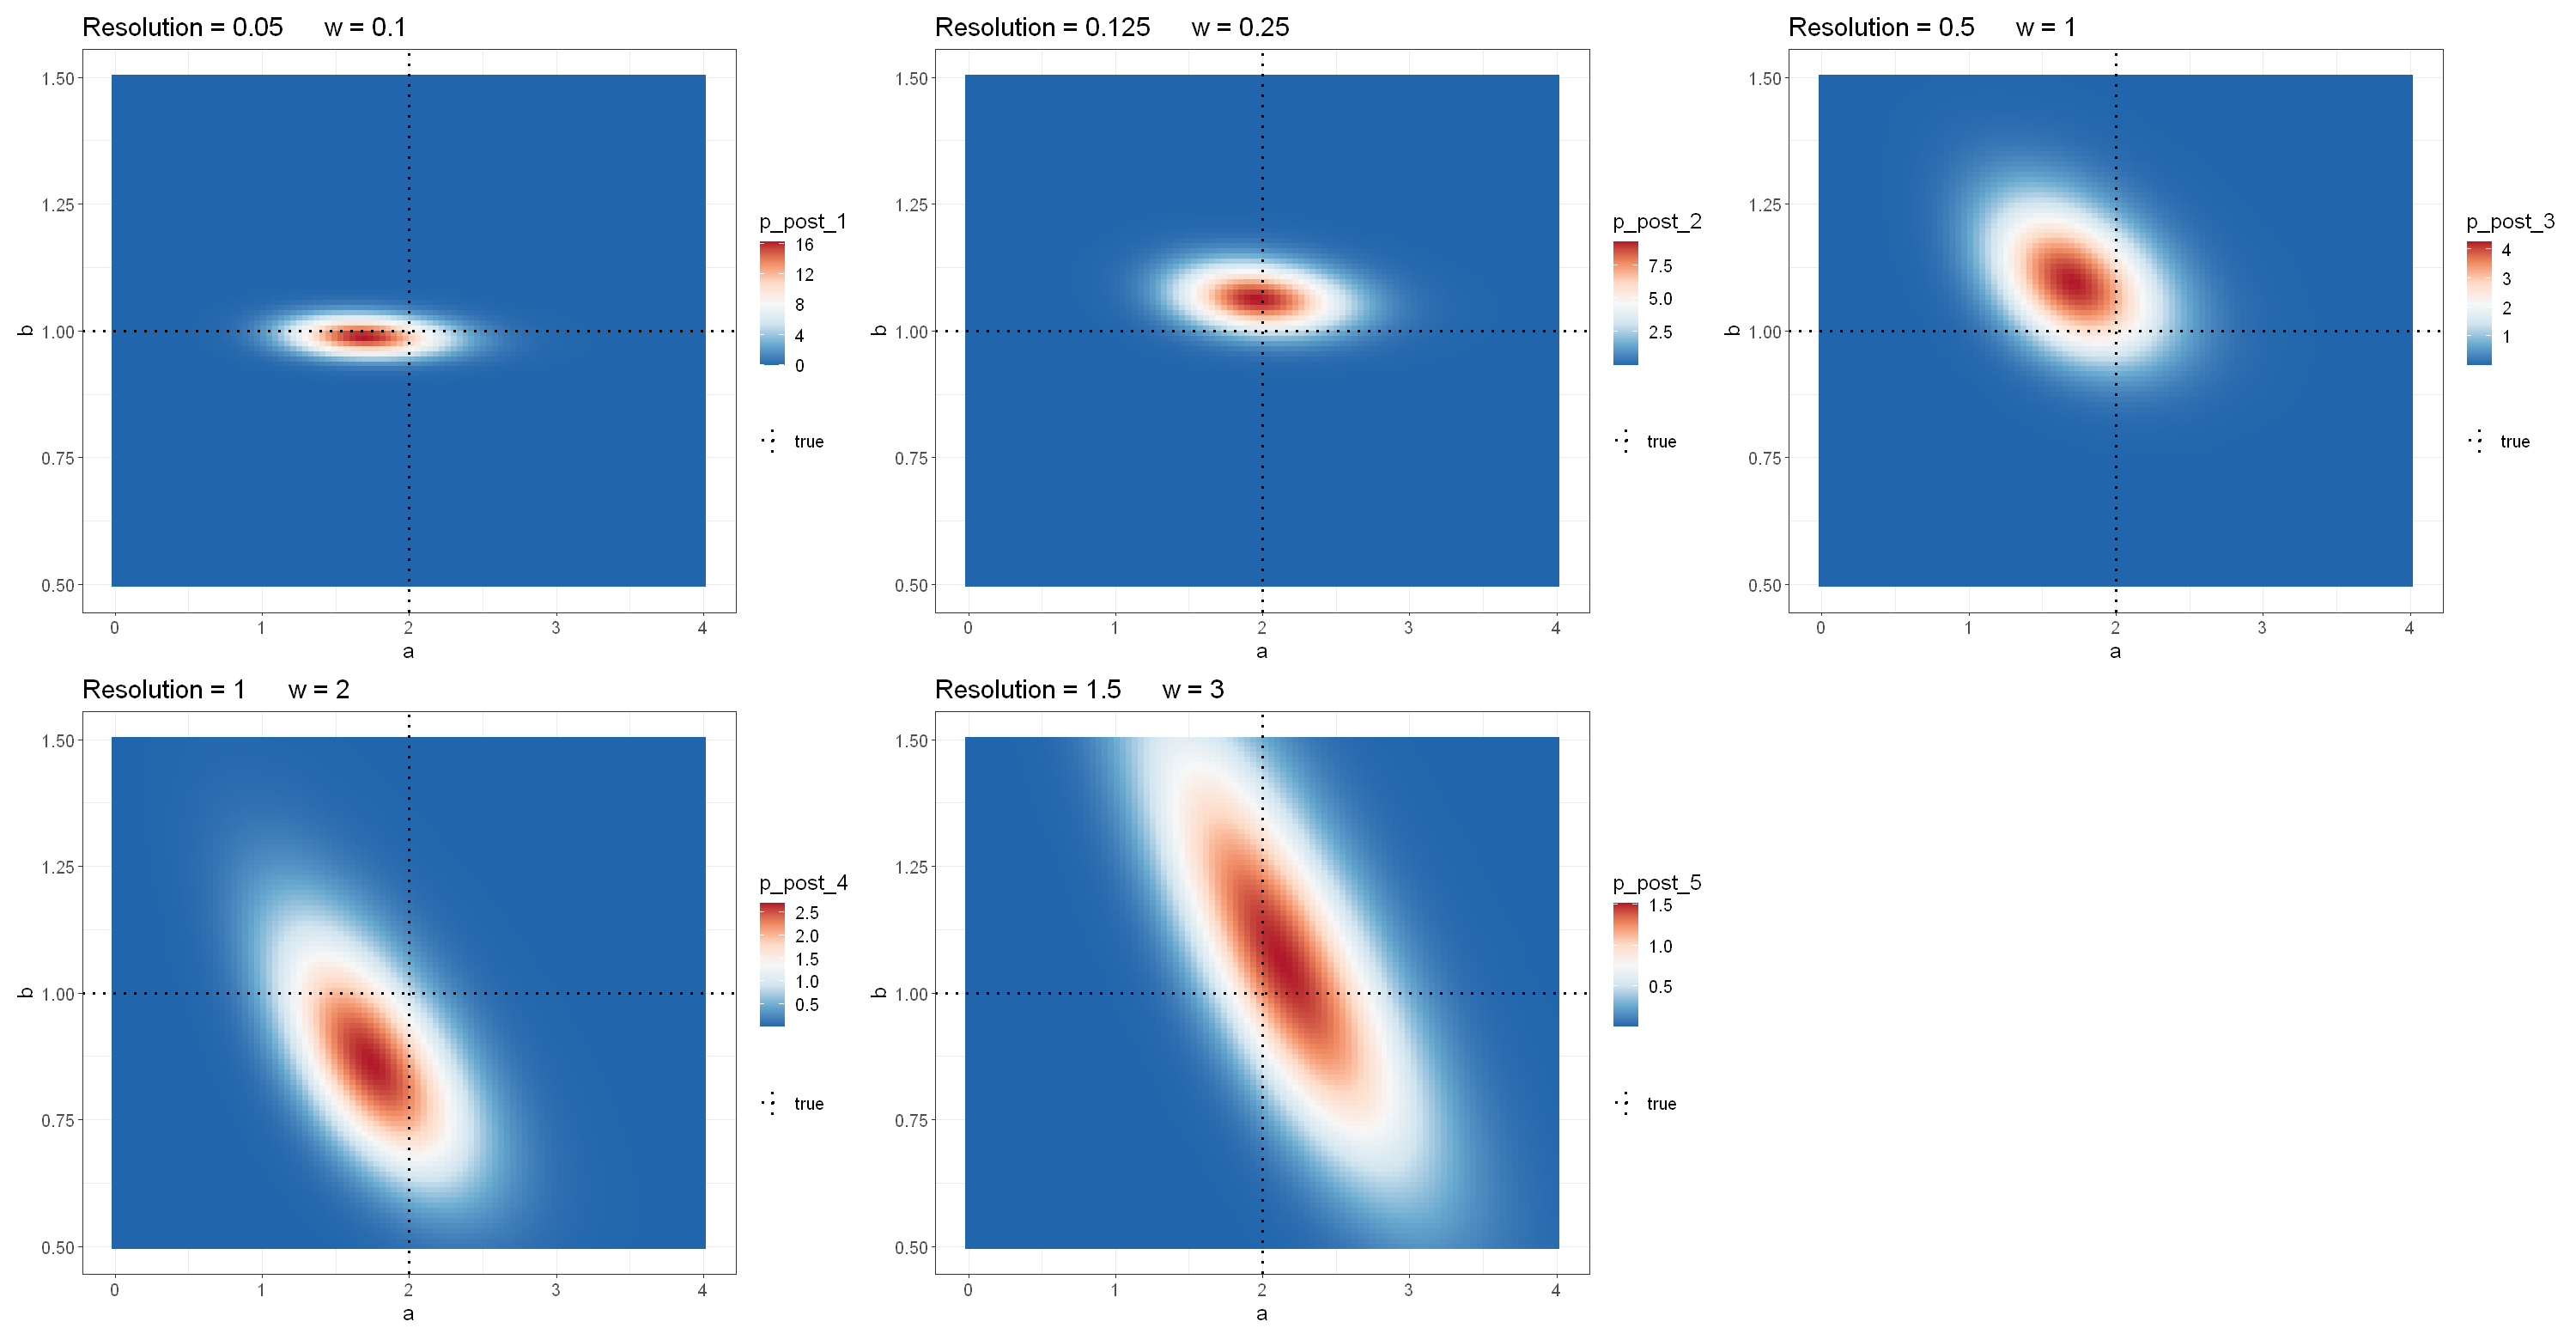

In [18]:
lintp = c('true' = 3)
p1 = ggplot(grid, aes(a, b, fill = get(names(grid)[3]))) + geom_tile() + scale_fill_distiller(name = names(grid)[3], palette = "RdBu") + 
    labs(title = paste('Resolution =', 0.5 * w_values[1], '     w =', w_values[1]), x = 'a', y = 'b') +
    geom_vline(aes(xintercept = A_true, linetype = 'true'), linewidth = 1.1) + 
    geom_hline(aes(yintercept = B_true, linetype = 'true'), linewidth = 1.1) + 
    scale_linetype_manual(name = '', values = lintp) +
    theme_bw() + 
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')
p2 = ggplot(grid, aes(a, b, fill = get(names(grid)[4]))) + geom_tile() + scale_fill_distiller(name = names(grid)[4], palette = "RdBu") + 
    labs(title = paste('Resolution =', 0.5 * w_values[2], '     w =', w_values[2]), x = 'a', y = 'b') +
    geom_vline(aes(xintercept = A_true, linetype = 'true'), linewidth = 1.1) + 
    geom_hline(aes(yintercept = B_true, linetype = 'true'), linewidth = 1.1) + 
    scale_linetype_manual(name = '', values = lintp) +
    theme_bw() + 
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')
p3 = ggplot(grid, aes(a, b, fill = get(names(grid)[5]))) + geom_tile() + scale_fill_distiller(name = names(grid)[5], palette = "RdBu") + 
    labs(title = paste('Resolution =', 0.5 * w_values[3], '     w =', w_values[3]), x = 'a', y = 'b') +
    geom_vline(aes(xintercept = A_true, linetype = 'true'), linewidth = 1.1) + 
    geom_hline(aes(yintercept = B_true, linetype = 'true'), linewidth = 1.1) + 
    scale_linetype_manual(name = '', values = lintp) +
    theme_bw() + 
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')
p4 = ggplot(grid, aes(a, b, fill = get(names(grid)[6]))) + geom_tile() + scale_fill_distiller(name = names(grid)[6], palette = "RdBu") + 
    labs(title = paste('Resolution =', 0.5 * w_values[4], '     w =', w_values[4]), x = 'a', y = 'b') +
    geom_vline(aes(xintercept = A_true, linetype = 'true'), linewidth = 1.1) + 
    geom_hline(aes(yintercept = B_true, linetype = 'true'), linewidth = 1.1) + 
    scale_linetype_manual(name = '', values = lintp) +
    theme_bw() + 
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')
p5 = ggplot(grid, aes(a, b, fill = get(names(grid)[7]))) + geom_tile() + scale_fill_distiller(name = names(grid)[7], palette = "RdBu") + 
    labs(title = paste('Resolution =', 0.5 * w_values[5], '     w =', w_values[5]), x = 'a', y = 'b') +
    geom_vline(aes(xintercept = A_true, linetype = 'true'), linewidth = 1.1) + 
    geom_hline(aes(yintercept = B_true, linetype = 'true'), linewidth = 1.1) + 
    scale_linetype_manual(name = '', values = lintp) +
    theme_bw() + 
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')

options(repr.plot.width = 25, repr.plot.height = 13)
p1 + p2 + p3 + p4 + p5

As before, here we marginalize and obtain the distributions for a and b. It is possible to notice that the distributions widen up as the resolution is reduced.

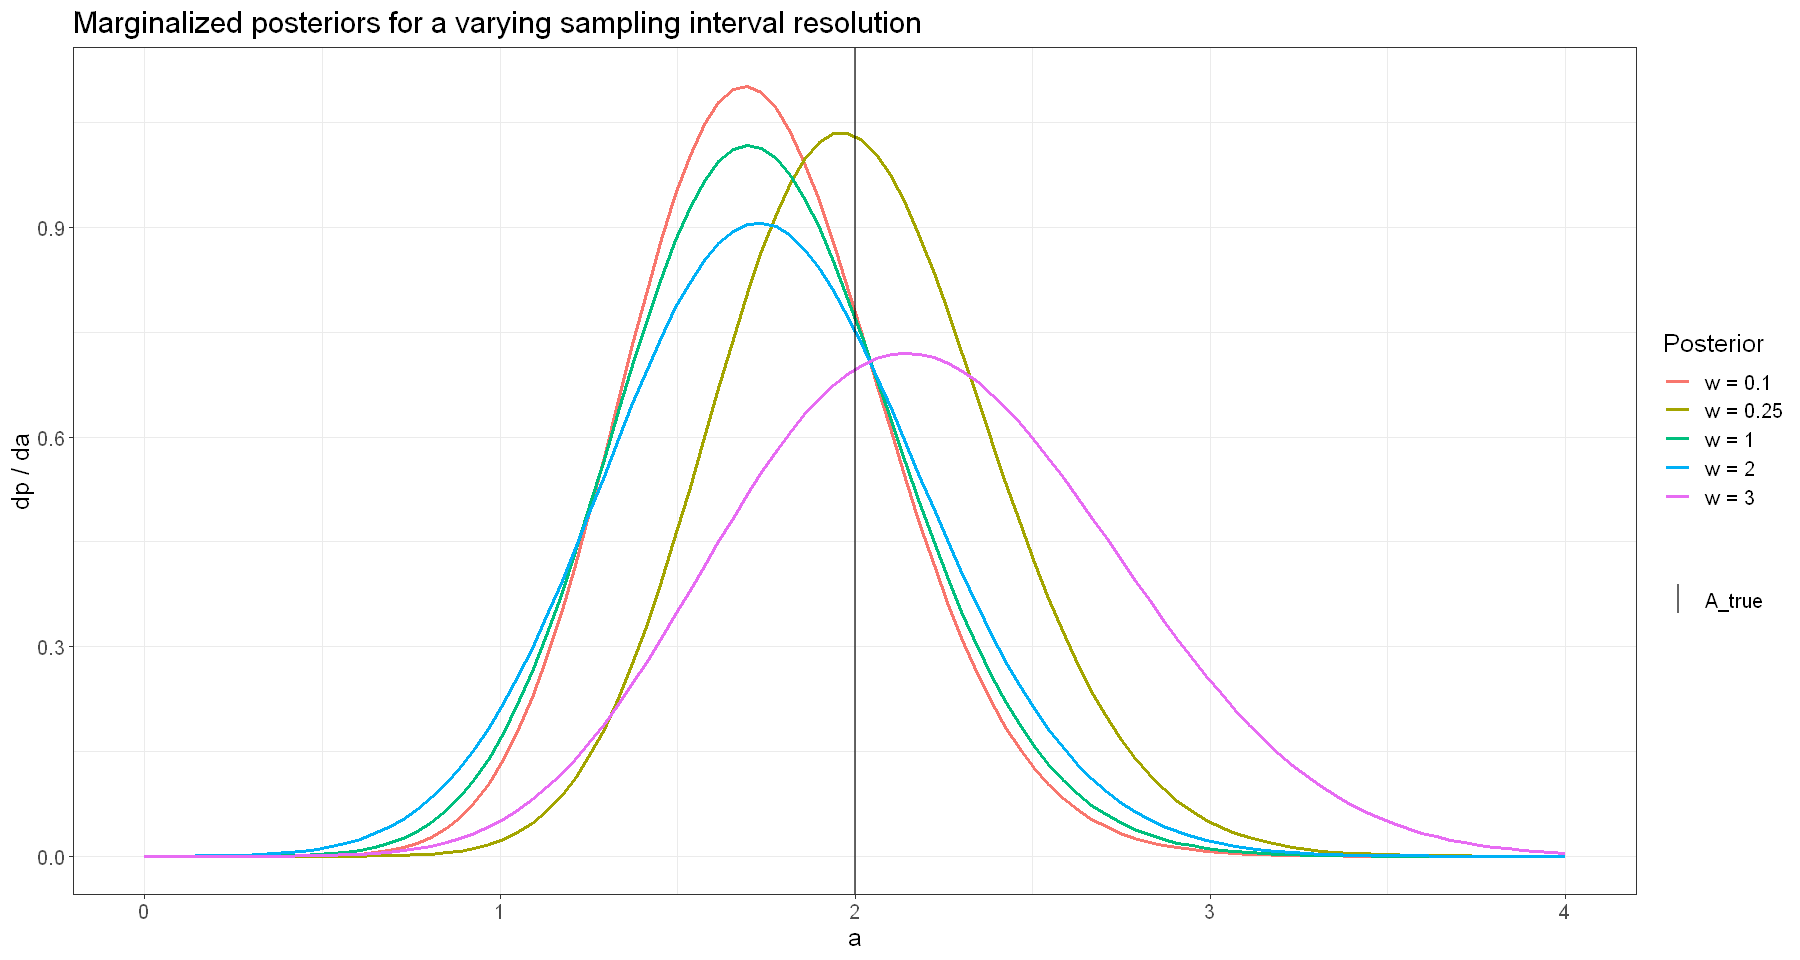

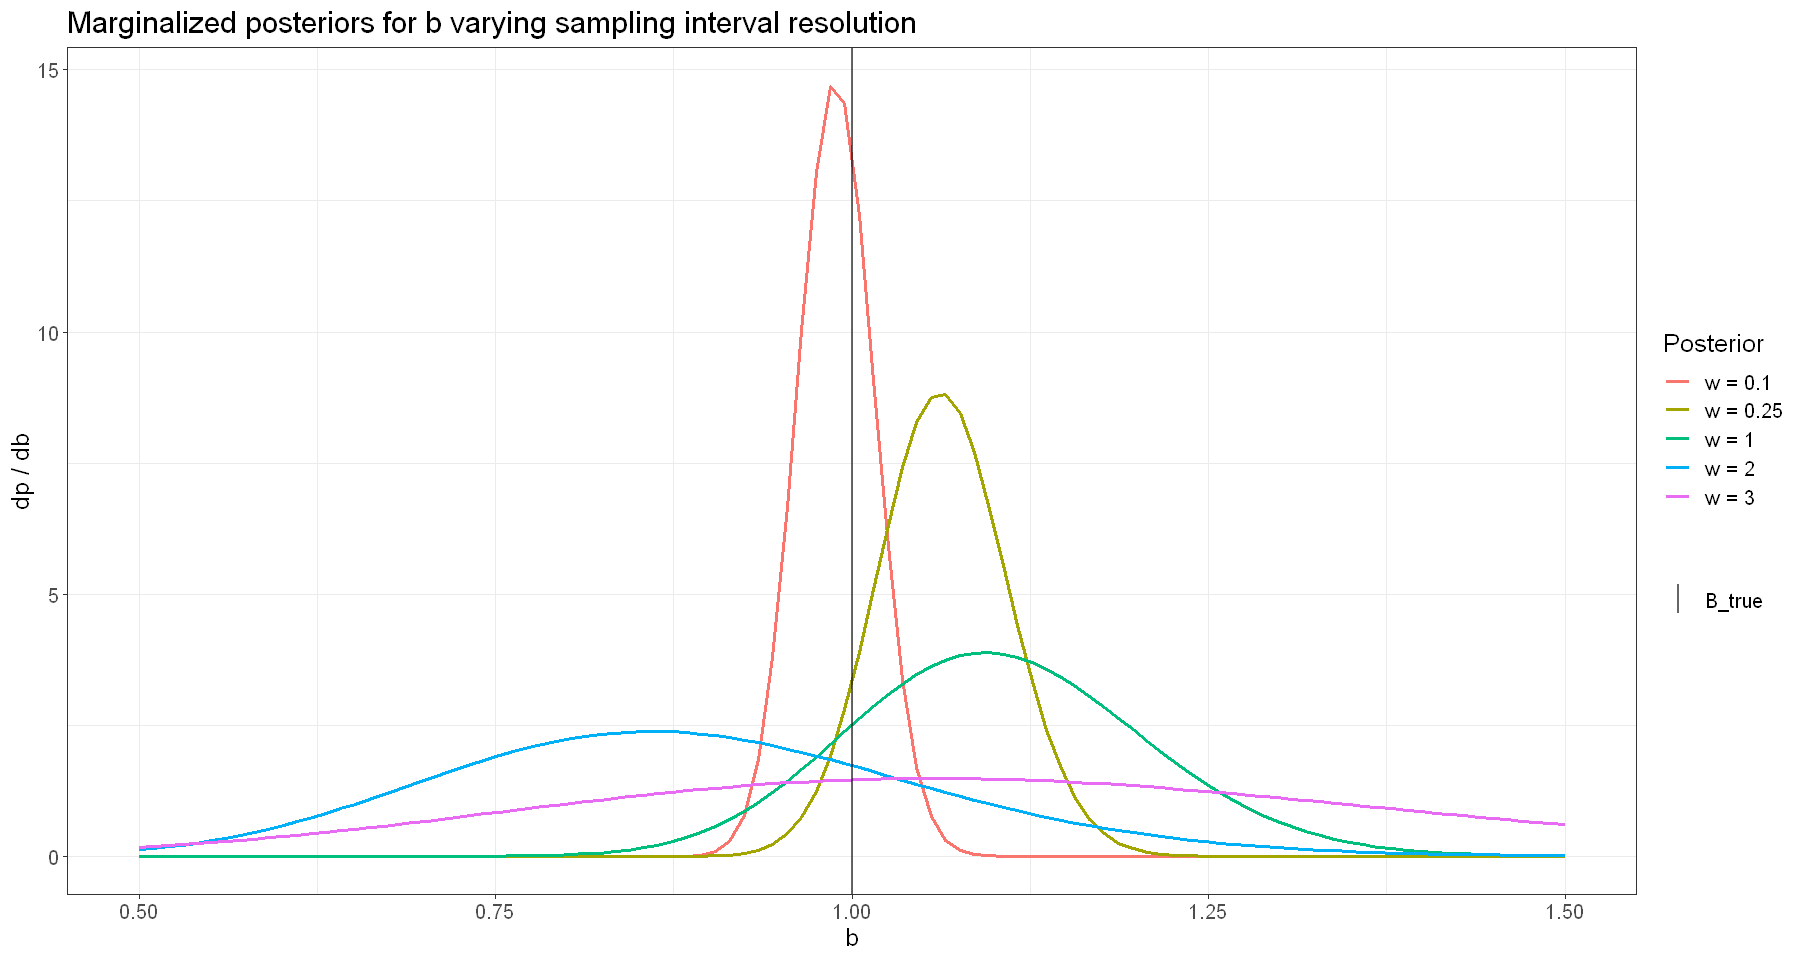

In [19]:
a_marg = grid %>% group_by(a) %>% 
    summarize(a_post_1 = sum(p_post_1 * d_b),
    a_post_2 = sum(p_post_2 * d_b),
    a_post_3 = sum(p_post_3 * d_b),
    a_post_4 = sum(p_post_4 * d_b),
    a_post_5 = sum(p_post_5 * d_b))

b_marg = grid %>% group_by(b) %>% 
    summarize(b_post_1 = sum(p_post_1 * d_a),
    b_post_2 = sum(p_post_2 * d_a),
    b_post_3 = sum(p_post_3 * d_a),
    b_post_4 = sum(p_post_4 * d_a),
    b_post_5 = sum(p_post_5 * d_a))

p1 = ggplot(data = a_marg) + 
    geom_line(aes(x = a_params, y = a_post_1, colour = 'w = 0.1'), linewidth = 0.9) +
    geom_line(aes(x = a_params, y = a_post_2, colour = 'w = 0.25'), linewidth = 0.9) +
    geom_line(aes(x = a_params, y = a_post_3, colour = 'w = 1'), linewidth = 0.9) +
    geom_line(aes(x = a_params, y = a_post_4, colour = 'w = 2'), linewidth = 0.9) +
    geom_line(aes(x = a_params, y = a_post_5, colour = 'w = 3'), linewidth = 0.9) +
    geom_vline(aes(xintercept = A_true, linetype = 'A_true'), linewidth = 0.7, alpha = 0.6) +
    labs(x = 'a', y = 'dp / da', colour = 'Posterior', linetype = '', 
        title = 'Marginalized posteriors for a varying sampling interval resolution') +
    theme_bw() +
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')

p2 = ggplot(data = b_marg) + 
    geom_line(aes(x = b_params, y = b_post_1, colour = 'w = 0.1'), linewidth = 0.9) +
    geom_line(aes(x = b_params, y = b_post_2, colour = 'w = 0.25'), linewidth = 0.9) +
    geom_line(aes(x = b_params, y = b_post_3, colour = 'w = 1'), linewidth = 0.9) +
    geom_line(aes(x = b_params, y = b_post_4, colour = 'w = 2'), linewidth = 0.9) +
    geom_line(aes(x = b_params, y = b_post_5, colour = 'w = 3'), linewidth = 0.9) +
    geom_vline(aes(xintercept = B_true, linetype = 'B_true'), linewidth = 0.7, alpha = 0.6) +
    labs(x = 'b', y = 'dp / db', colour = 'Posterior', linetype = '', 
        title = 'Marginalized posteriors for b varying sampling interval resolution') +
    theme_bw() +
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')

options(repr.plot.width=15, repr.plot.height=8)
p1
p2

Here we calculate and display the main features of the marginalized distributions

w,a_mode,a_expvalues,a_var,CI_95_low,CI_95_up
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.10,1.696970,1.731663,0.1324644,1.090909,2.505051
0.25,1.979798,2.005056,0.1497601,1.333333,2.828283
1.00,1.696970,1.738427,0.1550226,1.050505,2.585859
2.00,1.737374,1.754446,0.1942613,0.969697,2.666667
3.00,2.141414,2.202119,0.2914399,1.252525,3.353535


w,b_mode,b_expvalues,b_var,CI_95_low,CI_95_up
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.10,0.9848485,0.9889955,0.0007267436,0.9444444,1.055556
0.25,1.0656566,1.0638225,0.0020394981,0.9848485,1.166667
1.00,1.0959596,1.1029668,0.0105932761,0.9242424,1.328283
2.00,0.8636364,0.8869476,0.0278587602,0.6010101,1.247475
3.00,1.0555556,1.0526840,0.0555600925,0.6010101,1.479798


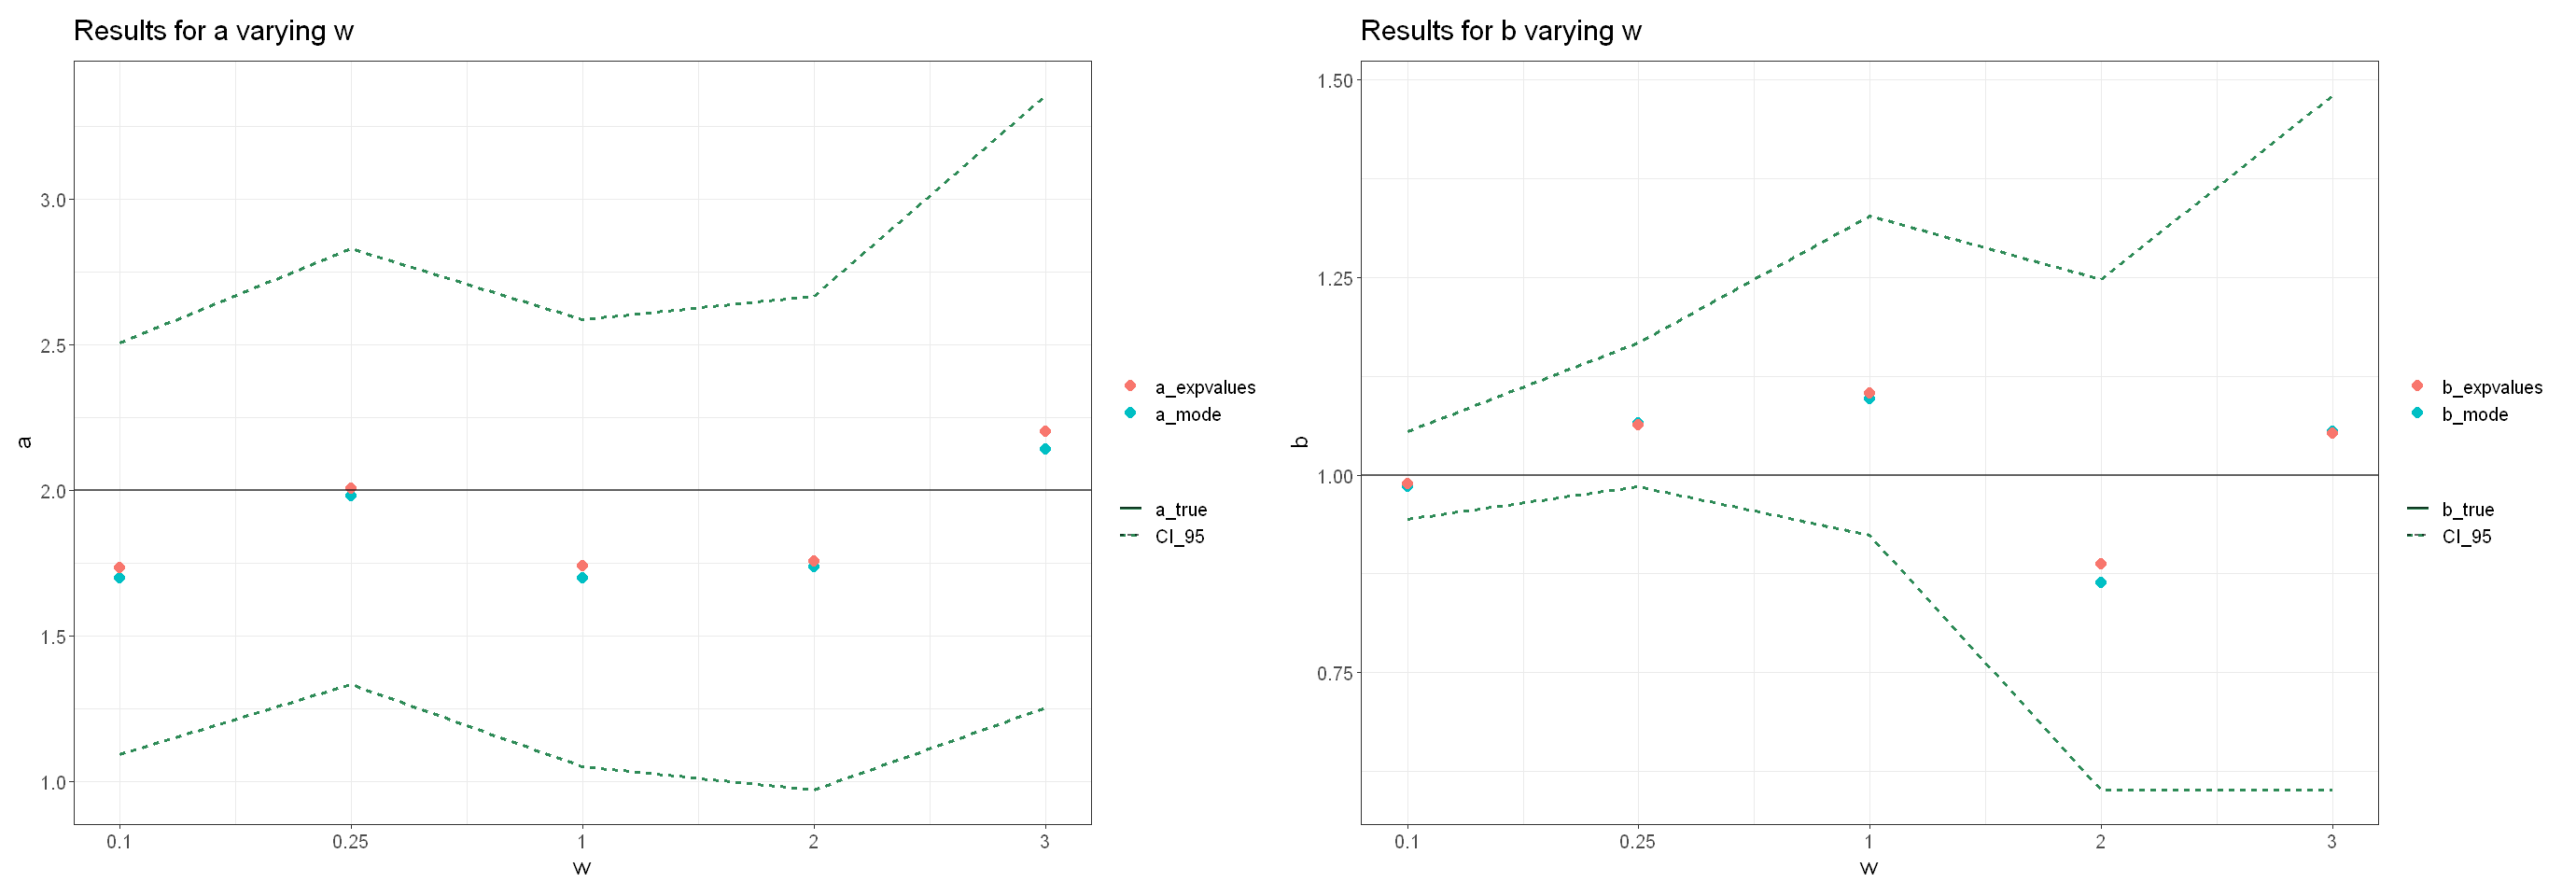

In [20]:
a_results = a_marg %>% 
    reframe(w = w_values,
    a_mode = c(a[which.max(a_post_1)], a[which.max(a_post_2)], a[which.max(a_post_3)], 
                a[which.max(a_post_4)], a[which.max(a_post_5)]),
    a_expvalues = c(sum(a * a_post_1 * d_a), sum(a * a_post_2 * d_a), sum(a * a_post_3 * d_a),
                        sum(a * a_post_4 * d_a), sum(a * a_post_5 * d_a)), 
    a_var = c(sum((a - sum(a * a_post_1 * d_a)) ** 2 * a_post_1 * d_a), 
                sum((a - sum(a * a_post_2 * d_a)) ** 2 * a_post_2 * d_a), 
                sum((a - sum(a * a_post_3 * d_a)) ** 2 * a_post_3 * d_a),
                sum((a - sum(a * a_post_4 * d_a)) ** 2 * a_post_4 * d_a), 
                sum((a - sum(a * a_post_5 * d_a)) ** 2 * a_post_5 * d_a)), 
    CI_95_low = c(dist_numintegrate(a, a_post_1, d_a, 0.025)[2], dist_numintegrate(a, a_post_2, d_a, 0.025)[2], dist_numintegrate(a, a_post_3, d_a, 0.025)[2],
                dist_numintegrate(a, a_post_4, d_a, 0.025)[2], dist_numintegrate(a, a_post_5, d_a, 0.025)[2]),
    CI_95_up = c(dist_numintegrate(a, a_post_1, d_a, 0.975)[2], dist_numintegrate(a, a_post_2, d_a, 0.975)[2], dist_numintegrate(a, a_post_3, d_a, 0.975)[2],
                dist_numintegrate(a, a_post_4, d_a, 0.975)[2], dist_numintegrate(a, a_post_5, d_a, 0.975)[2]))

a_results

b_results = b_marg %>% 
    reframe(w = w_values,
    b_mode = c(b[which.max(b_post_1)], b[which.max(b_post_2)], b[which.max(b_post_3)], 
                b[which.max(b_post_4)], b[which.max(b_post_5)]),
    b_expvalues = c(sum(b * b_post_1 * d_b), sum(b * b_post_2 * d_b), sum(b * b_post_3 * d_b),
                        sum(b * b_post_4 * d_b), sum(b * b_post_5 * d_b)), 
    b_var = c(sum((b - sum(b * b_post_1 * d_b)) ** 2 * b_post_1 * d_b), 
                sum((b - sum(b * b_post_2 * d_b)) ** 2 * b_post_2 * d_b), 
                sum((b - sum(b * b_post_3 * d_b)) ** 2 * b_post_3 * d_b),
                sum((b - sum(b * b_post_4 * d_b)) ** 2 * b_post_4 * d_b), 
                sum((b - sum(b * b_post_5 * d_b)) ** 2 * b_post_5 * d_b)), 
    CI_95_low = c(dist_numintegrate(b, b_post_1, d_b, 0.025)[2], dist_numintegrate(b, b_post_2, d_b, 0.025)[2], dist_numintegrate(b, b_post_3, d_b, 0.025)[2],
                dist_numintegrate(b, b_post_4, d_b, 0.025)[2], dist_numintegrate(b, b_post_5, d_b, 0.025)[2]),
    CI_95_up = c(dist_numintegrate(b, b_post_1, d_b, 0.975)[2], dist_numintegrate(b, b_post_2, d_b, 0.975)[2], dist_numintegrate(b, b_post_3, d_b, 0.975)[2],
                dist_numintegrate(b, b_post_4, d_b, 0.975)[2], dist_numintegrate(b, b_post_5, d_b, 0.975)[2]))

b_results

p1 = ggplot(data = a_results) +
    geom_point(aes(x = 1:5, y = a_mode, colour = 'a_mode'), shape = 16, size = 3) +
    geom_point(aes(x = 1:5, y = a_expvalues, colour = 'a_expvalues'), shape = 16, size = 3) +
    geom_line(aes(x = 1:5, y = CI_95_low, linetype = 'CI_95'), colour = 'seagreen', linewidth = 0.9) +
    geom_line(aes(x = 1:5, y = CI_95_up, linetype = 'CI_95'), colour = 'seagreen', linewidth = 0.9) +
    geom_hline(aes(yintercept = A_true, linetype = 'a_true'), linewidth = 0.7, alpha = 0.6) +
    scale_x_continuous(labels = w_values) + 
    labs(x = 'w', y = expression(a), colour = '', shape = '', linetype = '', 
        title = expression(paste('Results for a varying w', sep = ''))) +
    theme_bw() +
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')

p2 = ggplot(data = b_results) +
    geom_point(aes(x = 1:5, y = b_mode, colour = 'b_mode'), shape = 16, size = 3) +
    geom_point(aes(x = 1:5, y = b_expvalues, colour = 'b_expvalues'), shape = 16, size = 3) +
    geom_line(aes(x = 1:5, y = CI_95_low, linetype = 'CI_95'), colour = 'seagreen', linewidth = 0.9) +
    geom_line(aes(x = 1:5, y = CI_95_up, linetype = 'CI_95'), colour = 'seagreen', linewidth = 0.9) +
    geom_hline(aes(yintercept = B_true, linetype = 'b_true'), linewidth = 0.7, alpha = 0.6) +
    scale_x_continuous(labels = w_values) + 
    labs(x = 'w', y = expression(b), colour = '', shape = '', linetype = '', 
        title = expression(paste('Results for b varying w', sep = ''))) +
    theme_bw() +
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')

options(repr.plot.width=23, repr.plot.height=8)
p1 + p2

Here we calculate the covariances and the correlation indexes.

In [21]:
mu_a = a_results %>% select(a_expvalues) %>% pull()
mu_b = b_results %>% select(b_expvalues) %>% pull()
var_a = a_results %>% select(a_var) %>% pull()
var_b = b_results %>% select(b_var) %>% pull()

cov_tbl = grid %>% mutate(mu_a1 = mu_a[1], mu_a2 = mu_a[2], mu_a3 = mu_a[3], mu_a4 = mu_a[4], mu_a5 = mu_a[5]) %>% 
        mutate(mu_b1 = mu_b[1], mu_b2 = mu_b[2], mu_b3 = mu_b[3], mu_b4 = mu_b[4], mu_b5 = mu_b[5]) %>%
        group_by(a) %>% 
        summarize(par_ab1 = sum((a - mu_a1) * (b - mu_b1) * p_post_1) * d_b, 
        par_ab2 = sum((a - mu_a2) * (b - mu_b2) * p_post_2) * d_b,
        par_ab3 = sum((a - mu_a3) * (b - mu_b3) * p_post_3) * d_b,
        par_ab4 = sum((a - mu_a4) * (b - mu_b4) * p_post_4) * d_b,
        par_ab5 = sum((a - mu_a5) * (b - mu_b5) * p_post_5) * d_b) %>% 
        reframe(cov_ab1 = sum(par_ab1) * d_a,
        cov_ab2 = sum(par_ab2) * d_a,
        cov_ab3 = sum(par_ab3) * d_a,
        cov_ab4 = sum(par_ab4) * d_a,
        cov_ab5 = sum(par_ab5) * d_a,
        r_ab1 = cov_ab1 / sqrt(var_a[1] * var_b[1]),
        r_ab2 = cov_ab2 / sqrt(var_a[2] * var_b[2]),
        r_ab3 = cov_ab3 / sqrt(var_a[3] * var_b[3]),
        r_ab4 = cov_ab4 / sqrt(var_a[4] * var_b[4]),
        r_ab5 = cov_ab5 / sqrt(var_a[5] * var_b[5]))
head(cov_tbl)

cov_ab1,cov_ab2,cov_ab3,cov_ab4,cov_ab5,r_ab1,r_ab2,r_ab3,r_ab4,r_ab5
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-0.001134811,-0.003123434,-0.01530375,-0.04371817,-0.08733294,-0.1156601,-0.1787198,-0.3776464,-0.5942757,-0.6863128


## Request (b)

Change the ratio A/B used to simulate the data (keeping both positive in accordance with the prior)
- Check the effect on the results

In [22]:
w = w_values[1]
a_values = c(0.6, 0.8, 1, 1.5, 2, 3)
ab_ratio = a_values / B_true

xdat = seq(from = x_low, by = 0.5 * w, length.out = (x_up - x_low) / (0.5 * w))

strue1 = signal(xdat, a_values[1], B_true, x0, w, delta_t)
strue2 = signal(xdat, a_values[2], B_true, x0, w, delta_t)
strue3 = signal(xdat, a_values[3], B_true, x0, w, delta_t)
strue4 = signal(xdat, a_values[4], B_true, x0, w, delta_t)
strue5 = signal(xdat, a_values[5], B_true, x0, w, delta_t)
strue6 = signal(xdat, a_values[6], B_true, x0, w, delta_t)

ddat1 = rpois(length(strue1), strue1)
ddat2 = rpois(length(strue2), strue2)
ddat3 = rpois(length(strue3), strue3)
ddat4 = rpois(length(strue4), strue4)
ddat5 = rpois(length(strue5), strue5)
ddat6 = rpois(length(strue6), strue6)

In [23]:
n_points = 100
a_params = seq(from = 0, to = 4, length.out = n_points)
d_a = a_params[2] - a_params[1]
b_params = seq(from = 0.5, to = 1.5, length.out = n_points)
d_b = b_params[2] - b_params[1]

grid = expand.grid(a_params, b_params)
grid = as_tibble(grid)
grid = grid %>% rename('a' = 'Var1', 'b' = 'Var2')
head(grid)

a,b
<dbl>,<dbl>
0.00000000,0.5
0.04040404,0.5
0.08080808,0.5
0.12121212,0.5
0.16161616,0.5
0.20202020,0.5


In [24]:
for (j in 1:length(a_values)) {
    x = xdat
    d = switch(j, ddat1, ddat2, ddat3, ddat4, ddat5, ddat6)
    log_p_gridvalues = rep(0, nrow(grid))
    for (i in 1:nrow(grid)) {
        params = grid[i,] %>% unlist(use.names = F)
        log_p_gridvalues[i] = log_post(d, x, params[1], params[2], x0, w, delta_t)
    }
    grid = grid %>% mutate(log_p = log_p_gridvalues) %>% mutate(p_star = exp(log_p)) %>% mutate(z = p_star / sum(p_star * d_a * d_b))
    grid = grid %>% rename_with(~paste0('p_post_', j), starts_with('z'))
    grid = grid %>% select(-c(log_p, p_star))
}

head(grid)
tail(grid)

a,b,p_post_1,p_post_2,p_post_3,p_post_4,p_post_5,p_post_6
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.00000000,0.5,0,0,0,0,0,0
0.04040404,0.5,0,0,0,0,0,0
0.08080808,0.5,0,0,0,0,0,0
0.12121212,0.5,0,0,0,0,0,0
0.16161616,0.5,0,0,0,0,0,0
0.20202020,0.5,0,0,0,0,0,0


a,b,p_post_1,p_post_2,p_post_3,p_post_4,p_post_5,p_post_6
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3.797980,1.5,0,0,0,0,0,6.259341e-59
3.838384,1.5,0,0,0,0,0,5.007473e-59
3.878788,1.5,0,0,0,0,0,3.755605e-59
3.919192,1.5,0,0,0,0,0,2.503736e-59
3.959596,1.5,0,0,0,0,0,2.503736e-59
4.000000,1.5,0,0,0,0,0,1.251868e-59


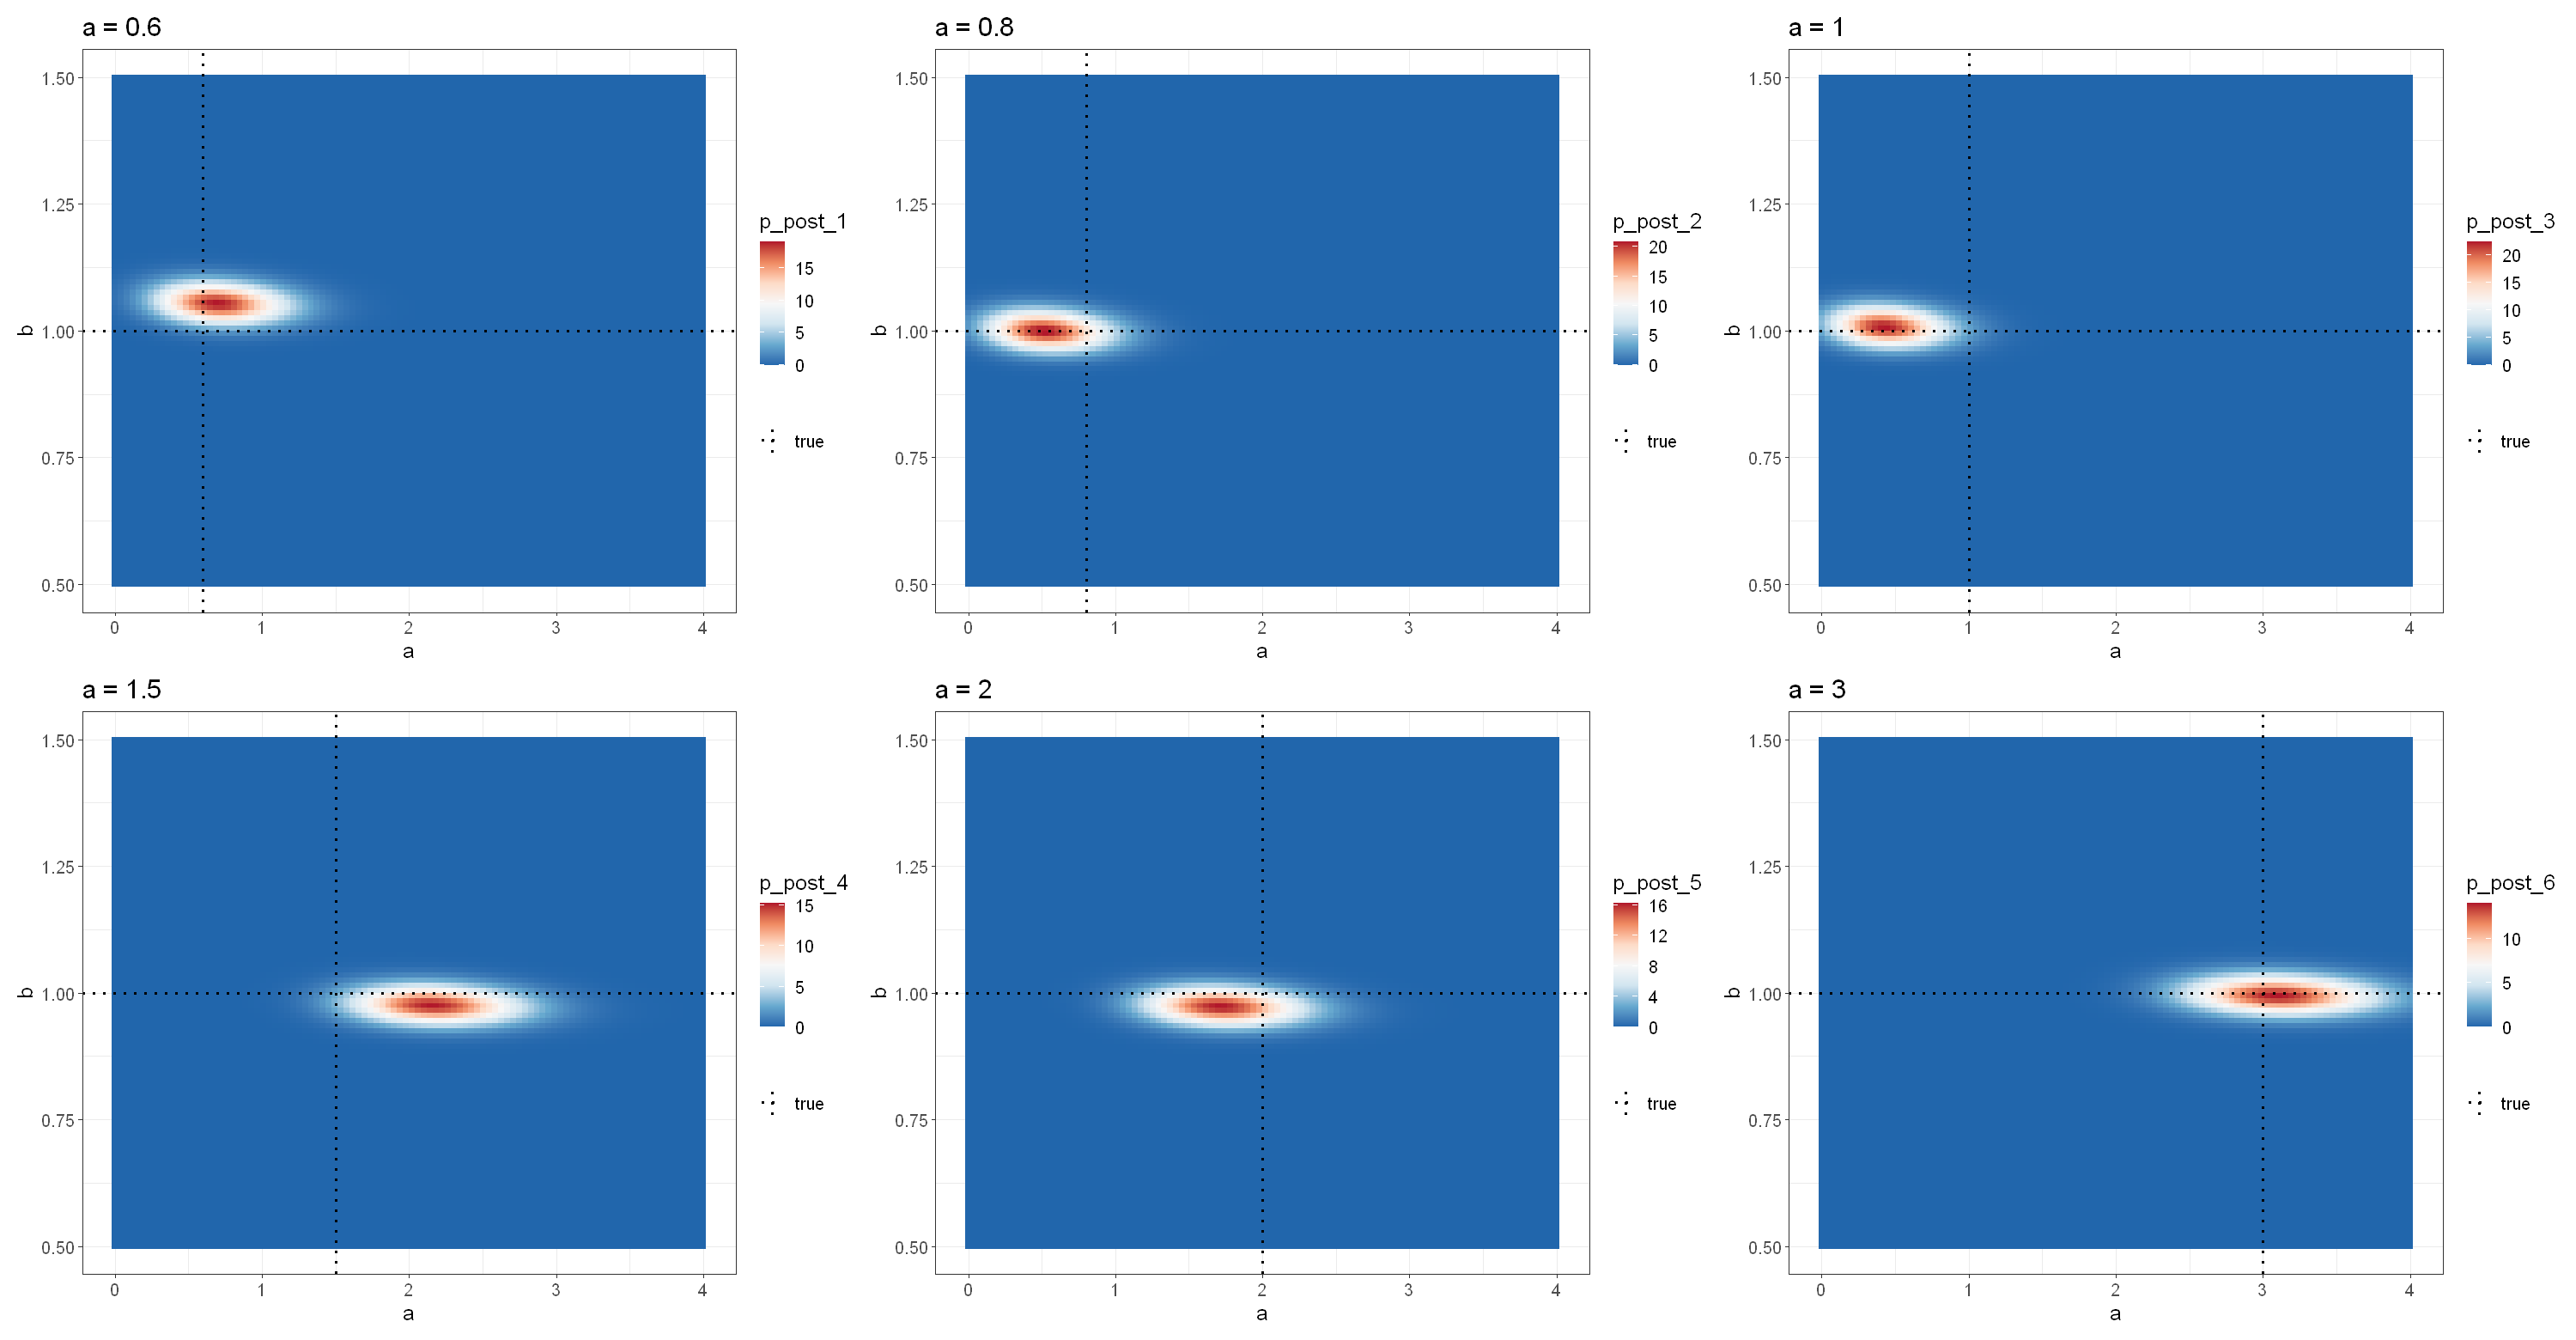

In [25]:
lintp = c('true' = 3)
p1 = ggplot(grid, aes(a, b, fill = get(names(grid)[3]))) + geom_tile() + scale_fill_distiller(name = names(grid)[3], palette = "RdBu") + 
    labs(title = paste('a =', a_values[1]), x = 'a', y = 'b') +
    geom_vline(aes(xintercept = a_values[1], linetype = 'true'), linewidth = 1.1) + 
    geom_hline(aes(yintercept = B_true, linetype = 'true'), linewidth = 1.1) + 
    scale_linetype_manual(name = '', values = lintp) +
    theme_bw() + 
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')
p2 = ggplot(grid, aes(a, b, fill = get(names(grid)[4]))) + geom_tile() + scale_fill_distiller(name = names(grid)[4], palette = "RdBu") + 
    labs(title = paste('a =', a_values[2]), x = 'a', y = 'b') +
    geom_vline(aes(xintercept = a_values[2], linetype = 'true'), linewidth = 1.1) + 
    geom_hline(aes(yintercept = B_true, linetype = 'true'), linewidth = 1.1) + 
    scale_linetype_manual(name = '', values = lintp) +
    theme_bw() + 
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')
p3 = ggplot(grid, aes(a, b, fill = get(names(grid)[5]))) + geom_tile() + scale_fill_distiller(name = names(grid)[5], palette = "RdBu") + 
    labs(title = paste('a =', a_values[3]), x = 'a', y = 'b') +
    geom_vline(aes(xintercept = a_values[3], linetype = 'true'), linewidth = 1.1) + 
    geom_hline(aes(yintercept = B_true, linetype = 'true'), linewidth = 1.1) + 
    scale_linetype_manual(name = '', values = lintp) +
    theme_bw() + 
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')
p4 = ggplot(grid, aes(a, b, fill = get(names(grid)[6]))) + geom_tile() + scale_fill_distiller(name = names(grid)[6], palette = "RdBu") + 
    labs(title = paste('a =', a_values[4]), x = 'a', y = 'b') +
    geom_vline(aes(xintercept = a_values[4], linetype = 'true'), linewidth = 1.1) + 
    geom_hline(aes(yintercept = B_true, linetype = 'true'), linewidth = 1.1) + 
    scale_linetype_manual(name = '', values = lintp) +
    theme_bw() + 
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')
p5 = ggplot(grid, aes(a, b, fill = get(names(grid)[7]))) + geom_tile() + scale_fill_distiller(name = names(grid)[7], palette = "RdBu") + 
    labs(title = paste('a =', a_values[5]), x = 'a', y = 'b') +
    geom_vline(aes(xintercept = a_values[5], linetype = 'true'), linewidth = 1.1) + 
    geom_hline(aes(yintercept = B_true, linetype = 'true'), linewidth = 1.1) + 
    scale_linetype_manual(name = '', values = lintp) +
    theme_bw() + 
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')
p6 = ggplot(grid, aes(a, b, fill = get(names(grid)[8]))) + geom_tile() + scale_fill_distiller(name = names(grid)[8], palette = "RdBu") + 
    labs(title = paste('a =', a_values[6]), x = 'a', y = 'b') +
    geom_vline(aes(xintercept = a_values[6], linetype = 'true'), linewidth = 1.1) + 
    geom_hline(aes(yintercept = B_true, linetype = 'true'), linewidth = 1.1) + 
    scale_linetype_manual(name = '', values = lintp) +
    theme_bw() + 
    theme(text = element_text(size = 15), legend.direction = 'vertical', legend.position = 'right')

options(repr.plot.width = 25, repr.plot.height = 13)
p1 + p2 + p3 + p4 + p5 + p6

In [26]:
a_marg = grid %>% group_by(a) %>% 
    summarize(a_post_1 = sum(p_post_1 * d_b),
    a_post_2 = sum(p_post_2 * d_b),
    a_post_3 = sum(p_post_3 * d_b),
    a_post_4 = sum(p_post_4 * d_b),
    a_post_5 = sum(p_post_5 * d_b),
    a_post_6 = sum(p_post_6 * d_b))

b_marg = grid %>% group_by(b) %>% 
    summarize(b_post_1 = sum(p_post_1 * d_a),
    b_post_2 = sum(p_post_2 * d_a),
    b_post_3 = sum(p_post_3 * d_a),
    b_post_4 = sum(p_post_4 * d_a),
    b_post_5 = sum(p_post_5 * d_a),
    b_post_6 = sum(p_post_6 * d_a))

a_results = a_marg %>% 
    reframe(ratio = ab_ratio,
    a_mode = c(a[which.max(a_post_1)], a[which.max(a_post_2)], a[which.max(a_post_3)], 
                a[which.max(a_post_4)], a[which.max(a_post_5)], a[which.max(a_post_6)]),
    a_expvalues = c(sum(a * a_post_1 * d_a), sum(a * a_post_2 * d_a), sum(a * a_post_3 * d_a),
                        sum(a * a_post_4 * d_a), sum(a * a_post_5 * d_a), sum(a * a_post_6 * d_a)), 
    a_var = c(sum((a - sum(a * a_post_1 * d_a)) ** 2 * a_post_1 * d_a), 
                sum((a - sum(a * a_post_2 * d_a)) ** 2 * a_post_2 * d_a), 
                sum((a - sum(a * a_post_3 * d_a)) ** 2 * a_post_3 * d_a),
                sum((a - sum(a * a_post_4 * d_a)) ** 2 * a_post_4 * d_a), 
                sum((a - sum(a * a_post_5 * d_a)) ** 2 * a_post_5 * d_a), 
                sum((a - sum(a * a_post_6 * d_a)) ** 2 * a_post_6 * d_a)), 
    CI_95_low = c(dist_numintegrate(a, a_post_1, d_a, 0.025)[2], dist_numintegrate(a, a_post_2, d_a, 0.025)[2], dist_numintegrate(a, a_post_3, d_a, 0.025)[2],
                dist_numintegrate(a, a_post_4, d_a, 0.025)[2], dist_numintegrate(a, a_post_5, d_a, 0.025)[2], dist_numintegrate(a, a_post_6, d_a, 0.025)[2]),
    CI_95_up = c(dist_numintegrate(a, a_post_1, d_a, 0.975)[2], dist_numintegrate(a, a_post_2, d_a, 0.975)[2], dist_numintegrate(a, a_post_3, d_a, 0.975)[2],
                dist_numintegrate(a, a_post_4, d_a, 0.975)[2], dist_numintegrate(a, a_post_5, d_a, 0.975)[2], dist_numintegrate(a, a_post_6, d_a, 0.8)[2]))

a_results

b_results = b_marg %>% 
    reframe(ratio = ab_ratio,
    b_mode = c(b[which.max(b_post_1)], b[which.max(b_post_2)], b[which.max(b_post_3)], 
                b[which.max(b_post_4)], b[which.max(b_post_5)], b[which.max(b_post_6)]),
    b_expvalues = c(sum(b * b_post_1 * d_b), sum(b * b_post_2 * d_b), sum(b * b_post_3 * d_b),
                        sum(b * b_post_4 * d_b), sum(b * b_post_5 * d_b), sum(b * b_post_6 * d_b)), 
    b_var = c(sum((b - sum(b * b_post_1 * d_b)) ** 2 * b_post_1 * d_b), 
                sum((b - sum(b * b_post_2 * d_b)) ** 2 * b_post_2 * d_b), 
                sum((b - sum(b * b_post_3 * d_b)) ** 2 * b_post_3 * d_b),
                sum((b - sum(b * b_post_4 * d_b)) ** 2 * b_post_4 * d_b), 
                sum((b - sum(b * b_post_5 * d_b)) ** 2 * b_post_5 * d_b), 
                sum((b - sum(b * b_post_6 * d_b)) ** 2 * b_post_6 * d_b)), 
    CI_95_low = c(dist_numintegrate(b, b_post_1, d_b, 0.025)[2], dist_numintegrate(b, b_post_2, d_b, 0.025)[2], dist_numintegrate(b, b_post_3, d_b, 0.025)[2],
                dist_numintegrate(b, b_post_4, d_b, 0.025)[2], dist_numintegrate(b, b_post_5, d_b, 0.025)[2], dist_numintegrate(b, b_post_6, d_b, 0.025)[2]),
    CI_95_up = c(dist_numintegrate(b, b_post_1, d_b, 0.975)[2], dist_numintegrate(b, b_post_2, d_b, 0.975)[2], dist_numintegrate(b, b_post_3, d_b, 0.975)[2],
                dist_numintegrate(b, b_post_4, d_b, 0.975)[2], dist_numintegrate(b, b_post_5, d_b, 0.975)[2], dist_numintegrate(b, b_post_6, d_b, 0.975)[2]))

b_results

ratio,a_mode,a_expvalues,a_var,CI_95_low,CI_95_up
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.6,0.6868687,0.7423057,0.09146181,0.24242424,1.414141
0.8,0.5252525,0.5692663,0.07781510,0.12121212,1.212121
1.0,0.4444444,0.4838696,0.06718376,0.08080808,1.090909
1.5,2.1414141,2.1980008,0.15551159,1.49494949,3.030303
2.0,1.6969697,1.7558769,0.13723233,1.13131313,2.545455
3.0,3.1111111,3.1092791,0.16335335,2.34343434,3.515152


ratio,b_mode,b_expvalues,b_var,CI_95_low,CI_95_up
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.6,1.0555556,1.0538517,0.0007725645,1.0151515,1.116162
0.8,0.9949495,0.9998053,0.0007317643,0.9545455,1.065657
1.0,1.0050505,1.0077608,0.0007351039,0.9646465,1.075758
1.5,0.9747475,0.9756453,0.0007186570,0.9343434,1.035354
2.0,0.9747475,0.9728476,0.0007164283,0.9343434,1.035354
3.0,0.9949495,0.9953866,0.0007315339,0.9545455,1.055556
